In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [52]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')

In [5]:
## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [7]:
filenames = glob.glob('Nline_*.mat')
print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
data_dict.keys()

['Nline_02001-Mar1615.mat', 'Nline_02002-Mar1915.mat', 'Nline_02003-Mar2015a.mat', 'Nline_02004-Mar2315a.mat', 'Nline_02005-Mar2315a.mat', 'Nline_02006-Mar2315a.mat', 'Nline_02007-Mar2415a.mat', 'Nline_02009-Mar2615a.mat', 'Nline_02010-Mar2615a.mat', 'Nline_02011-Mar2615a.mat', 'Nline_02012-Apr0215a.mat', 'Nline_02014-Apr0315a.mat', 'Nline_02015Apr2715a.mat', 'Nline_02016-Apr2715a.mat', 'Nline_02017-Apr2815a.mat', 'Nline_02018-Apr2815a.mat', 'Nline_02019-Apr2915a.mat', 'Nline_02020-May1815a.mat', 'Nline_02021-May2515a.mat', 'Nline_02022-May2515a.mat', 'Nline_02023-May2715a.mat', 'Nline_02024-May2815a.mat', 'Nline_02027-Jun0115a.mat']


['s_02009',
 's_02003',
 's_02002',
 's_02001',
 's_02007',
 's_02006',
 's_02005',
 's_02004',
 's_02018',
 's_02019',
 's_02010',
 's_02011',
 's_02012',
 's_02014',
 's_02015',
 's_02016',
 's_02017',
 's_02024',
 's_02027',
 's_02021',
 's_02020',
 's_02023',
 's_02022']

In [8]:
sub_ex = data_dict.keys()[1]

In [9]:
#data_dict['s_00011']['p']

In [10]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [11]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][0][5][0][0]
len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

49

In [12]:
data_dict[sub_ex]['p'].dtype.names

('ramp_up',
 'Mean_ITI',
 'Mean_hold',
 'decision',
 'consider',
 'runs',
 'nStim',
 'ntasks',
 'tasks',
 'trialSecs',
 'lineLength',
 'speed',
 'run_order',
 'NlineResults',
 'time_Runs',
 'task_transition',
 'start_Nline',
 'finish_Nline')

In [13]:
#Comment this out for include all subjects
#Data removed because these were pilot participants with incomplete data
data_dict.pop('s_02001')
data_dict.pop('s_02002')
#Data Removed for problems with fMRI data
data_dict.pop('s_02009')
data_dict.pop('s_02020')

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon May 18 13:04:31 2015',
 '__version__': '1.0',
 'p': array([[ ([[14]], [[4.5]], [[4]], [[3]], [[0.5]], [[4]], [[16]], [[3]], [[array([u'Nline'], 
       dtype='<U5'), array([u'Negline'], 
       dtype='<U7'), array([u'Control'], 
       dtype='<U7')]], [[12]], [[1500]], [[6]], [[2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]], [[[array([u'Task'], 
       dtype='<U4'), array([u'Task'], 
       dtype='<U4'), array([u'Task'], 
       dtype='<U4'), array([u'Task'], 
       dtype='<U4')], [array([u'Probe'], 
       dtype='<U5'), array([u'Probe'], 
       dtype='<U5'), array([u'Probe'], 
       dtype='<U5'), array([u'Probe'], 
       dtype='<U5')], [array([u'Line_pct'], 
       dtype='<U8'), array([u'Line_pct'], 
       dtype='<U8'), array([u'Line_pct'], 
       dtype='<U8'), array([u'Line_pct'], 
       dtype='<U8')], [array([u'catch'], 
       dtype='<U5'), array([u'catch'], 
       dtype='<U5'), array([u'

In [14]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [15]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'Run_'+str(run)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [16]:
new_dat[sub_ex]['NlineResults']['Run_1'].keys()

[u'Slow',
 u'Line_pct',
 u'iti',
 u'TestX',
 u'ITI_onset_real',
 u'consider_onset_real',
 u'ITI_onset',
 u'RT',
 u'hold',
 u'decision_end',
 u'decision_onset_real',
 u'RTHold',
 u'decision_end_real',
 u'Correct',
 u'Wrong',
 u'BadPress',
 u'consider_onset',
 u'Response',
 u'Task',
 u'Trial',
 u'Points',
 u'Error',
 u'catch',
 u'mouse_pos',
 u'Block',
 u'catch_probe',
 u'Probe',
 u'hold_onset',
 u'Move',
 u'decision_onset',
 u'hold_onset_real',
 u'Click']

In [17]:
new_dat[sub_ex]['NlineResults']['Run_1']['Probe']

[u'me',
 u'if',
 u'so',
 u'as',
 u'he',
 u'we',
 u'am',
 u'my',
 u'do',
 u'is',
 u'of',
 u'it',
 u'ox',
 u'be',
 u'or',
 u'by',
 array([65], dtype=uint8),
 array([74], dtype=uint8),
 array([45], dtype=uint8),
 array([90], dtype=uint8),
 array([85], dtype=uint8),
 array([21], dtype=uint8),
 array([98], dtype=uint8),
 array([77], dtype=uint8),
 array([33], dtype=uint8),
 array([28], dtype=uint8),
 array([11], dtype=uint8),
 array([36], dtype=uint8),
 array([7], dtype=uint8),
 array([3], dtype=uint8),
 array([57], dtype=uint8),
 array([60], dtype=uint8),
 array([-94], dtype=int16),
 array([30], dtype=uint8),
 array([-28], dtype=int16),
 array([48], dtype=uint8),
 array([70], dtype=uint8),
 array([-44], dtype=int16),
 array([-86], dtype=int16),
 array([-34], dtype=int16),
 array([20], dtype=uint8),
 array([14], dtype=uint8),
 array([80], dtype=uint8),
 array([-78], dtype=int16),
 array([54], dtype=uint8),
 array([96], dtype=uint8),
 array([-10], dtype=int16),
 array([-58], dtype=int16)]

In [18]:
#new_dat[sub_ex]['NlineResults']['Run_1']['catch_probe']

In [19]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['Run_0'].keys())

In [20]:
indexes[90]

('s_02003', 'Run_2', 42)

In [21]:
indexes[1][1]

'Run_3'

In [22]:
varnames = new_dat[sub_ex][Nline]['Run_0'].keys()
varnames[24]

u'Block'

In [23]:
len(indexes)

3648

In [24]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe', 'MouseTrack', 'Probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        elif var == probes[1]:
            if new_dat.get(data[0]).get(Nline).get(data[1]).get(var,0) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1])[var] = []
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)) <= data[2]:
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        elif var == probes[2]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 1:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 2:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        else:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
    Dic_list.append(temp_dict)

In [25]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
sum(nline_df.loc[sub_ex].loc['Run_3'].iloc[0:48]['catch'])

12

In [26]:
nline_df.loc[sub_ex].loc['Run_0']['catch']

Trial
0     0
1     0
2     0
3     1
4     1
5     0
6     0
7     1
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    1
40    0
41    0
42    1
43    0
44    0
45    0
46    1
47    1
Name: catch, dtype: int64

In [27]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
nline_df.index.names

FrozenList([u'Subject', u'Run', u'Trial'])

In [28]:
#test = nline_df['Probe']
#for i in range(0,len(test)):
#    test[i] = np.ravel(test[i])
#    test[i] = test[i][0]
#nline_df['Probe'] = test
#nline_df['Probe']

### Create Stim Labels

In [124]:
#now nline
#nline_df['Num'] = nline_df['Num'].map('{:.0f}'.format)
#nline_df['Denom'] = nline_df['Denom'].map('{:.0f}'.format)
#nline_df['Stim'] = nline_df['Num']+'/'+nline_df['Denom']
#nline_df['Stim']

In [29]:
nline_df.columns

Index([u'BadPress', u'Block', u'Click', u'Correct', u'Error', u'ITI_onset',
       u'ITI_onset_real', u'Line_pct', u'Move', u'Points', u'Probe', u'RT',
       u'RTHold', u'Response', u'Slow', u'Task', u'TestX', u'Trial', u'Wrong',
       u'catch', u'catch_probe', u'consider_onset', u'consider_onset_real',
       u'decision_end', u'decision_end_real', u'decision_onset',
       u'decision_onset_real', u'hold', u'hold_onset', u'hold_onset_real',
       u'iti', u'mouse_pos'],
      dtype='object')

# Number Line Analyses

### Accuracy & RT

In [30]:
nline_df['catch'].sum()

912

In [33]:
nline_no_miss = nline_df[['Error', 'RT', 'RTHold', 'catch', 'Task', 'Line_pct', 'Response']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
len(nline_no_miss)

2736

In [34]:
nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss = nline_no_miss.drop('catch', 1)

In [36]:
nline_no_miss['Missed'] = nline_no_miss['Error']
nline_no_miss['Missed'][nline_no_miss['Missed']<1] = 0

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
nline_missed = nline_no_miss.loc[nline_no_miss['Missed']==1,:]
position_missed = nline_no_miss.groupby(['Task', 'Line_pct'])
position_missed = position_missed['Missed']

In [38]:
responded = nline_no_miss.copy()
responded.loc[:,:] = nline_no_miss.loc[nline_no_miss['Missed']==0,:]
responded['AbsError'] = np.abs(responded['Error'])

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py:212: PerformanceWarning: indexing past lexsort depth may impact performance.
  handler(stream, idents, msg)


In [39]:
responded = responded[pd.notnull(responded['Task'])]

In [40]:
responded.Line_pct.unique()

array([ 0.74,  0.07,  0.11,  0.21,  0.77,  0.28,  0.03,  0.98,  0.85,
        0.33,  0.57,  0.6 ,  0.9 ,  0.45,  0.36,  0.65])

#### How many trials missed?

In [41]:
nline_missed['Missed'].groupby(level=0).sum()

Subject
s_02003     7
s_02004     3
s_02005    17
s_02006     2
s_02007     1
s_02010     7
s_02011     7
s_02012    15
s_02014     7
s_02015     6
s_02016    10
s_02017    10
s_02018     4
s_02019     6
s_02021     5
s_02022    18
s_02023     5
s_02024    10
s_02027     6
Name: Missed, dtype: float64

In [42]:
missed = nline_missed['Missed'].groupby(level=0).sum()

In [43]:
responded['RT'].groupby(level=0).count()

Subject
s_02003    137
s_02004    141
s_02005    127
s_02006    142
s_02007    143
s_02010    137
s_02011    137
s_02012    129
s_02014    137
s_02015    138
s_02016    134
s_02017    134
s_02018    140
s_02019    138
s_02021    139
s_02022    126
s_02023    139
s_02024    134
s_02027    138
dtype: int64

# RT Histograms

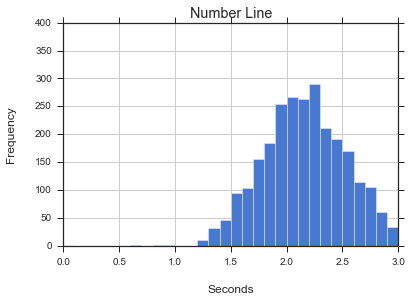

In [53]:
#pd.options.display.mpl_style = 'default'
nline_no_miss['RT'].hist(bins=30, range=[0,3])
plt.ylim([0,400])
plt.title('Number Line')
plt.xlabel('Seconds', labelpad = 18)
plt.ylabel('Frequency', labelpad = 18)

## Missed by position

In [54]:
position_missed.sum()

Task  Line_pct
1     0.03         4
      0.07         6
      0.11         5
      0.21         3
      0.28         5
      0.33         5
      0.36         5
      0.45         1
      0.57         3
      0.60         0
      0.65         0
      0.74         5
      0.77         1
      0.85         5
      0.90         3
      0.98         2
2     0.03         7
      0.07         3
      0.11         2
      0.21         2
      0.28         2
      0.33         1
      0.36         1
      0.45         1
      0.57         1
      0.60         0
      0.65         0
      0.74         4
      0.77         0
      0.85         7
      0.90         1
      0.98         7
3     0.03         3
      0.07         5
      0.11         3
      0.21         2
      0.28         1
      0.33         3
      0.36         2
      0.45         3
      0.57         2
      0.60         3
      0.65         2
      0.74         4
      0.77         1
      0.85         3
      0.90         

In [55]:
missed_position = position_missed.sum()
pos_miss_1 = missed_position.iloc[0:16]
pos_miss_2 = missed_position.iloc[16:32]
pos_miss_3 = missed_position.iloc[32:48]
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
#len(pos_miss_1)

In [56]:
pal = sns.color_palette()

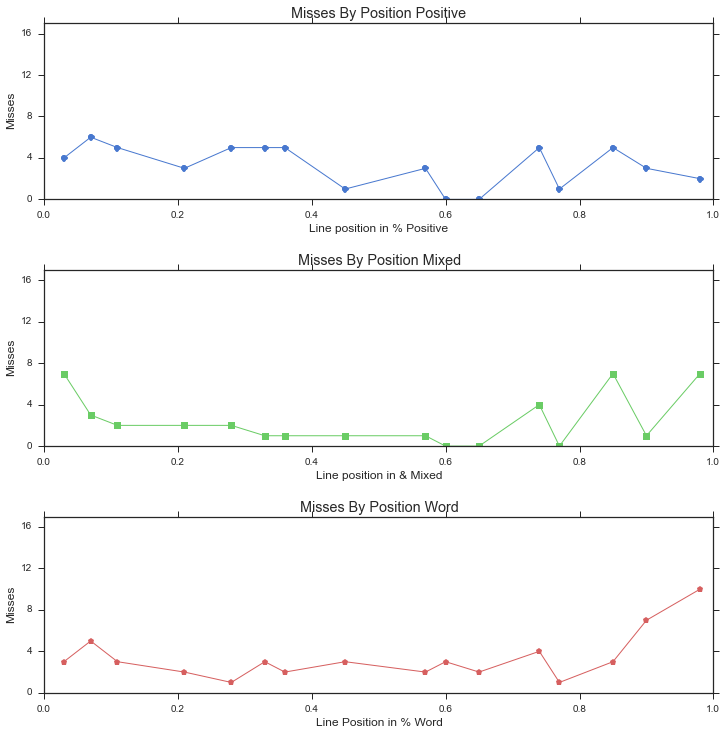

In [57]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, pos_miss_1, 'o-', color=pal[0])
plt.title('Misses By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, pos_miss_2, color=pal[1], marker='s')
plt.title('Misses By Position Mixed')
plt.xlabel('Line position in & Mixed', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, pos_miss_3, color=pal[2], marker='p')
plt.title('Misses By Position Word')
plt.xlabel('Line Position in % Word', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

plt.subplots_adjust(hspace=.4)

How many trials did they actually respond?

## RTHold missed analysis

In [59]:
nline_missed['RTHold'].groupby(level=0).mean()

Subject
s_02003    0.580029
s_02004    0.371789
s_02005    0.523442
s_02006    0.318201
s_02007    0.446265
s_02010    0.617966
s_02011    0.586275
s_02012    0.432686
s_02014    0.439934
s_02015    0.620800
s_02016    0.969234
s_02017    0.460634
s_02018    0.409631
s_02019    0.387337
s_02021    0.455508
s_02022    0.981399
s_02023    1.329770
s_02024    0.595365
s_02027    0.886305
Name: RTHold, dtype: float64

## RT Hold Missed Overall Average

In [60]:
np.mean(nline_missed['RTHold'].groupby(level=0).mean())

0.6006616251699701

In [61]:
responded.loc[:,'RT_Diff'] = responded['RT']-responded['RTHold']

## Averages by subjected for responded trials

In [62]:
responded[['Error', 'RT', 'RTHold', 'RT_Diff', 'AbsError']].groupby(level=0).mean()

,Error,RT,RTHold,RT_Diff,AbsError
Subject,,,,,
s_02003,0.002544,2.240014,0.480898,1.759116,0.022472
s_02004,0.000621,2.181841,0.390107,1.791734,0.020997
s_02005,-0.004826,2.378822,0.468106,1.910716,0.021902
s_02006,-0.000487,1.970216,0.422093,1.548123,0.026771
s_02007,-0.009034,2.117213,0.430258,1.686955,0.027687
s_02010,-0.003834,1.801020,0.402272,1.398747,0.034298
s_02011,0.005220,2.177101,0.512704,1.664397,0.031181
s_02012,0.015029,2.281063,0.420507,1.860557,0.042743
s_02014,0.000828,2.200079,0.485166,1.714912,0.033909


## Overall Averages

In [63]:
np.mean(responded[['Error', 'RT', 'RTHold','RT_Diff','AbsError']].groupby(level=0).mean())

Error      -0.001112
RT          2.158480
RTHold      0.468119
RT_Diff     1.690361
AbsError    0.028118
dtype: float64

## Plots by position

In [151]:
position_tasks = responded.groupby(['Task', 'Line_pct'])

In [69]:
n_subj = len(responded.groupby(level=0))

In [70]:
n_subj

19

In [71]:
position_tasks['RT'].median()

Task  Line_pct
1     0.03        2.161957
      0.07        2.213271
      0.11        2.224539
      0.21        2.228525
      0.28        2.245255
      0.33        2.092777
      0.36        2.255009
      0.45        1.836783
      0.57        1.878623
      0.60        1.942630
      0.65        2.063328
      0.74        2.212588
      0.77        2.292436
      0.85        2.291725
      0.90        2.225351
      0.98        2.252183
2     0.03        2.275656
      0.07        2.294566
      0.11        2.275776
      0.21        2.135642
      0.28        2.192337
      0.33        2.158153
      0.36        2.014846
      0.45        1.826811
      0.57        1.961669
      0.60        1.973212
      0.65        2.057821
      0.74        2.209358
      0.77        2.208522
      0.85        2.295057
      0.90        2.343608
      0.98        2.252394
3     0.03        2.250447
      0.07        2.308164
      0.11        2.276068
      0.21        2.275077
      0.28   

In [72]:
rts = position_tasks['RT'].median()
rts_std = position_tasks['RT'].std()
rts_se = rts_std/np.sqrt(n_subj)

Next code is to calculate standard error by first computing the mean RT for each subject and then taking the std of the subjects.
First I calculate the mean for each subject and each position (3 numbers)

In [129]:
D = {}
for sub in responded.groupby(level=0).groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = {'raw':[],'medianRT':[], 'stdRT': [], 'error_raw':[], 'stdError':[],
                             'medianError':[],'sign_error_raw':[], 'sign_error_SD':[],
                             'sign_error_median':[], 'SD_raw':[],'SD_median':[]}
        D[task][stim]['raw'].append(position_tasks.get_group((task,stim)).loc[sub]['RT'].mean())
        D[task][stim]['error_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['AbsError'].mean())
        D[task][stim]['sign_error_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())
        D[task][stim]['SD_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].std())

Then I take the std deviation between sebjects and also the median between subjects

In [130]:
np.sort(D[task].keys())

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

In [131]:
for task in D:
    #print task
    for stim in np.sort(D[task].keys()):
        D[task][stim]['stdRT'] = np.nanstd(D[task][stim]['raw'])
        D[task][stim]['medianRT'] = np.nanmedian(D[task][stim]['raw'])
        D[task][stim]['stdError'] = np.nanstd(D[task][stim]['error_raw'])
        D[task][stim]['medianError'] = np.nanmedian(D[task][stim]['error_raw'])
        D[task][stim]['sign_error_SD'] = np.nanstd(D[task][stim]['sign_error_raw'])
        D[task][stim]['sign_error_median'] = np.nanmedian(D[task][stim]['sign_error_raw'])
        D[task][stim]['SD_median'] = np.nanmedian(D[task][stim]['SD_raw'])

In [77]:
D[1.0][0.03]['medianRT']

2.1941431103332434

In [91]:
rts_1 = []
rts_2 = []
rts_3 = []
for stim in np.sort(D[1].keys()):
    rts_1.append(D[1][stim]['medianRT'])
for stim in np.sort(D[2].keys()):
    rts_2.append(D[2][stim]['medianRT'])
for stim in np.sort(D[3].keys()):
    rts_3.append(D[3][stim]['medianRT'])

In [79]:
rts_std_1 = []
rts_std_2 = []
rts_std_3 = []
for stim in np.sort(D[1].keys()):
    rts_std_1.append(D[1][stim]['stdRT'])
for stim in np.sort(D[2].keys()):
    rts_std_2.append(D[2][stim]['stdRT'])
for stim in np.sort(D[3].keys()):
    rts_std_3.append(D[3][stim]['stdRT'])

In [80]:
rts_se_1 = rts_std_1/np.sqrt(n_subj)
rts_se_2 = rts_std_2/np.sqrt(n_subj)
rts_se_3 = rts_std_3/np.sqrt(n_subj)

In [81]:
rts_1_med = rts.iloc[0:16]
rts_2_med = rts.iloc[16:32]
rts_3_med = rts.iloc[32:48]

rts_1 is median across subjects after averaging together instances of same stimuli within subject

In [93]:
rts_1

[2.1941431103332434,
 2.2625153035000949,
 2.2122020773331315,
 2.2302643426667905,
 2.1441888730005303,
 2.0932763039997249,
 2.1822279266677165,
 1.8232561143328592,
 1.8449865169995974,
 2.0105599810003696,
 2.0280011783324881,
 2.1518788043334403,
 2.2652497320001808,
 2.3055506013327736,
 2.2729198416664076,
 2.2644427116671673]

rts_med is median of all trials within a task without taking into account within subject differences

In [85]:
rts_1_med

Task  Line_pct
1     0.03        2.161957
      0.07        2.213271
      0.11        2.224539
      0.21        2.228525
      0.28        2.245255
      0.33        2.092777
      0.36        2.255009
      0.45        1.836783
      0.57        1.878623
      0.60        1.942630
      0.65        2.063328
      0.74        2.212588
      0.77        2.292436
      0.85        2.291725
      0.90        2.225351
      0.98        2.252183
Name: RT, dtype: float64

In [87]:
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(rts_1)
xvals1 = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.900, 0.980])

## Overall Median

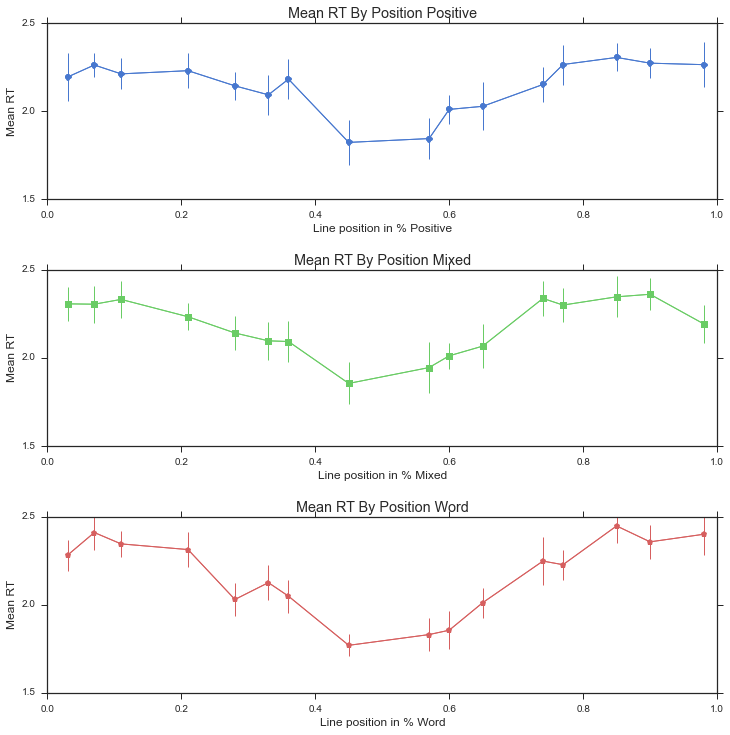

In [89]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, rts_1, 'o-', color=pal[0])
fig1.errorbar(xvals, rts_1, yerr=rts_se_1*1.96)
plt.title('Mean RT By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, rts_2, color=pal[1], marker='s')
fig2.errorbar(xvals, rts_2, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, rts_3, color=pal[2], marker='p')
fig3.errorbar(xvals, rts_3, yerr=rts_se_3*1.96, color=pal[2])
plt.title('Mean RT By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

plt.subplots_adjust(hspace=.4)

In [102]:
rts_1corr = [rts_1[i] - rts_3[i] for i in range(0,len(rts_1))]
rts_2corr = [rts_2[i] - rts_3[i] for i in range(0,len(rts_2))]

([<matplotlib.axis.YTick at 0x11073a090>,
 <a list of 5 Text yticklabel objects>)

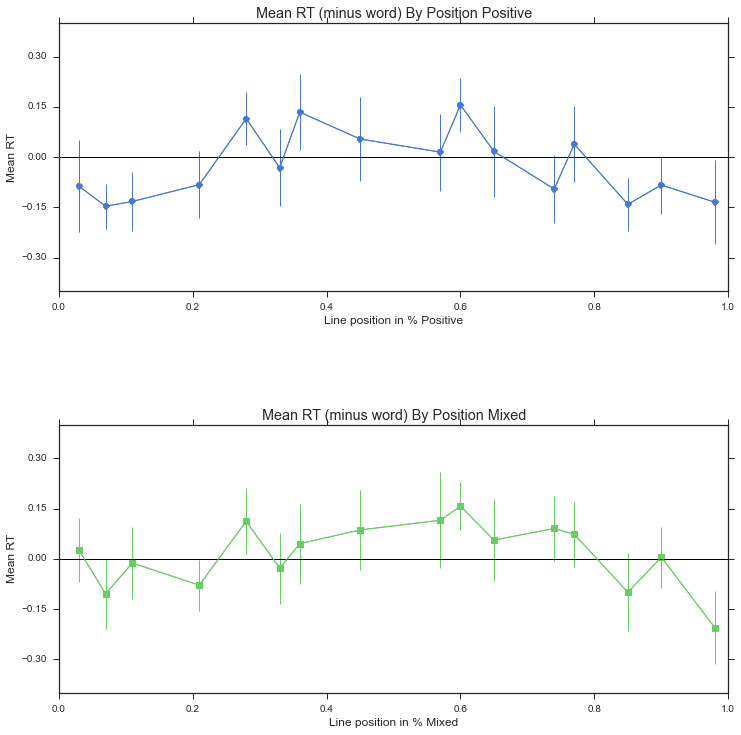

In [104]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(2,1,1)
fig1.plot(xvals, rts_1corr, 'o-', color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
fig1.errorbar(xvals, rts_1corr, yerr=rts_se_1*1.96)
plt.title('Mean RT (minus word) By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

fig2 = plt.subplot(2,1,2)
fig2.plot(xvals, rts_2corr, color=pal[1], marker='s')
fig2.plot([0,1], [0,0], color='black', linestyle='-')
fig2.errorbar(xvals, rts_2corr, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT (minus word) By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

## Error  plots

In [106]:
error = position_tasks['AbsError'].median()
error_std = position_tasks['AbsError'].std()
error_se = error_std/np.sqrt(n_subj)

In [122]:
error_1_med = error.iloc[0:16]
error_2_med = error.iloc[16:32]
error_3_med = error.iloc[32:48]
error_se_1 = error_se.iloc[0:16]
error_se_2 = error_se.iloc[16:32]
error_se_3 = error_se.iloc[32:48]

In [108]:
len(D[1].keys())

16

In [115]:
error_1 = []
error_2 = []
error_3 = []
for stim in np.sort(D[1].keys()):
    error_1 .append(D[1][stim]['medianError'])
for stim in np.sort(D[2].keys()):
    error_2 .append(D[2][stim]['medianError'])
for stim in np.sort(D[3].keys()):
    error_3.append(D[3][stim]['medianError'])

In [117]:
error_1

[0.024860499265785607,
 0.029251101321585909,
 0.032907488986784139,
 0.038193832599118932,
 0.035888399412628481,
 0.028832599118942717,
 0.047224669603524207,
 0.018869309838472847,
 0.018105726872246763,
 0.02011747430249633,
 0.032378854625550645,
 0.026343612334801758,
 0.026740088105726884,
 0.026358296622613835,
 0.033920704845814963,
 0.016328928046989748]

In [116]:
error_1_med = error_1_med.get_values()
error_2_med = error_2_med.get_values()
error_3_med = error_3_med.get_values()

In [118]:
error_1_med

array([ 0.02726872,  0.0269163 ,  0.02973568,  0.03378855,  0.03110132,
        0.03123348,  0.04502203,  0.01696035,  0.01713656,  0.01409692,
        0.03105727,  0.02431718,  0.02973568,  0.02312775,  0.02995595,
        0.02      ])

In [119]:
error_std_1 = []
error_std_2 = []
error_std_3 = []
for stim in np.sort(D[1].keys()):
    error_std_1.append(D[1][stim]['stdError'])
for stim in np.sort(D[2].keys()):
    error_std_2.append(D[2][stim]['stdError'])
for stim in np.sort(D[3].keys()):
    error_std_3.append(D[3][stim]['stdError'])

In [124]:
error_se1 = error_std_1/np.sqrt(n_subj)
error_se2 = error_std_2/np.sqrt(n_subj)
error_se3 = error_std_3/np.sqrt(n_subj)

## MAE by position

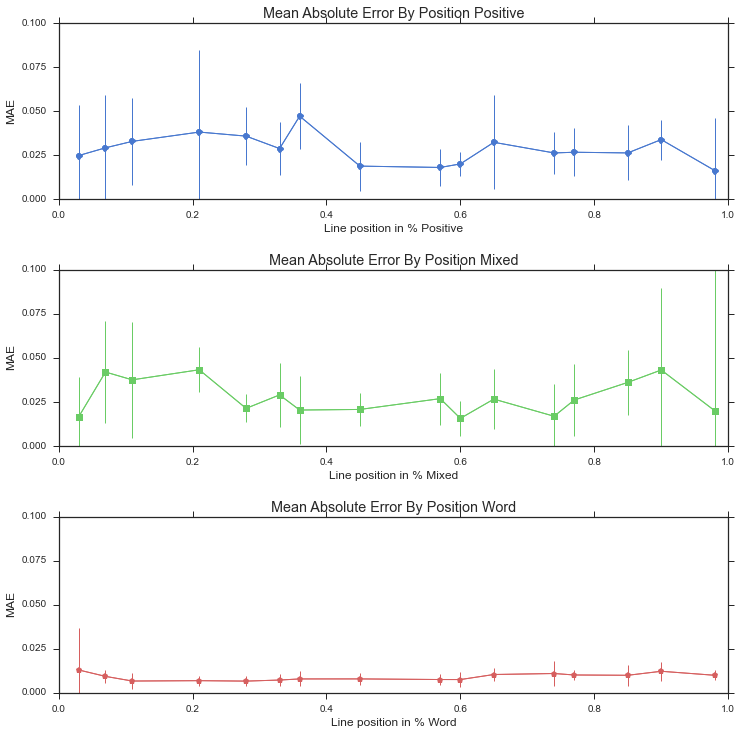

In [125]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1, 'o-', color=pal[0])
fig1.errorbar(xvals, error_1, yerr=error_se_1*1.96, color=pal[0])
plt.title('Mean Absolute Error By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2, color=pal[1], marker='s')
fig2.errorbar(xvals, error_2, yerr=error_se_2*1.96, color=pal[1])
plt.title('Mean Absolute Error By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3, color=pal[2], marker='p')
fig3.errorbar(xvals, error_3, yerr=error_se_3*1.96, color=pal[2])
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

plt.subplots_adjust(hspace=.4)

## Signed error is calculated as Response - Correct

In [132]:
signerror_1 = []
signerror_2 = []
signerror_3 = []
for stim in np.sort(D[1].keys()):
    signerror_1.append(D[1][stim]['sign_error_median'])
for stim in np.sort(D[2].keys()):
    signerror_2.append(D[2][stim]['sign_error_median'])
for stim in np.sort(D[3].keys()):
    signerror_3.append(D[3][stim]['sign_error_median'])

In [133]:
SD_signerror_1 = []
SD_signerror_2 = []
SD_signerror_3 = []
for stim in np.sort(D[1].keys()):
    SD_signerror_1.append(D[1][stim]['sign_error_SD'])
for stim in np.sort(D[2].keys()):
    SD_signerror_2.append(D[2][stim]['sign_error_SD'])
for stim in np.sort(D[3].keys()):
    SD_signerror_3.append(D[3][stim]['sign_error_SD'])

In [134]:
SE_signerror_1 = SD_signerror_1/np.sqrt(n_subj)
SE_signerror_2 = SD_signerror_2/np.sqrt(n_subj)
SE_signerror_3 = SD_signerror_3/np.sqrt(n_subj)

In [135]:
SD_1 = []
SD_2 = []
SD_3 = []
for stim in np.sort(D[1].keys()):
    SD_1.append(D[1][stim]['SD_median'])
for stim in np.sort(D[2].keys()):
    SD_2.append(D[2][stim]['SD_median'])
for stim in np.sort(D[3].keys()):
    SD_3.append(D[3][stim]['SD_median'])

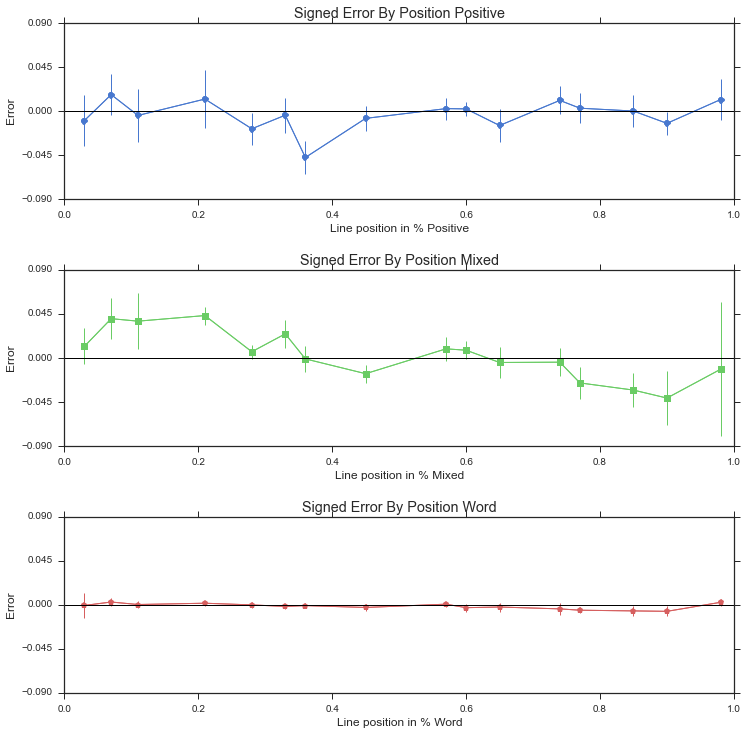

In [136]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1, 'o-', color=pal[0])
fig1.errorbar(xvals, signerror_1, yerr=SE_signerror_1*1.96, color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2, color=pal[1], marker='s')
fig2.errorbar(xvals, signerror_2, yerr=SE_signerror_2*1.96, color=pal[1])
fig2.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3, color=pal[2], marker='p')
fig3.errorbar(xvals, signerror_3, yerr=SE_signerror_3*1.96, color=pal[2])
fig3.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

plt.subplots_adjust(hspace=.4)

## Positive values in the graph above mean participant overestimated, negative values mean participant underestimated. In the -/+ task participants tend to give answers further from the endpoints than they should (This might have to do with the fact that the line is divided in 200 units unlike + task).

## SD calculated as std of each subject and then averaging the individual std

###Only 3 datapoints per position per subject so estimate will have a lot of varriability

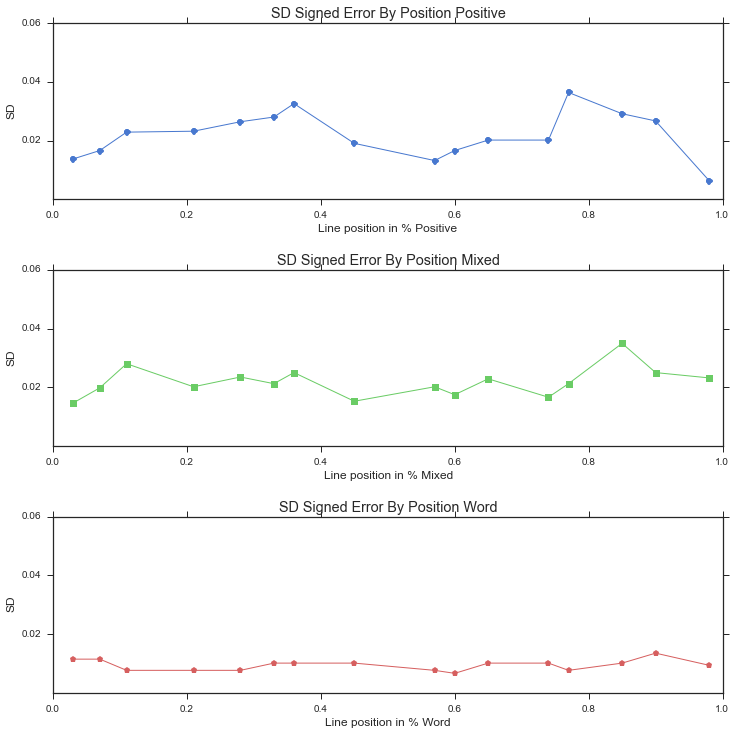

In [137]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, SD_1, 'o-', color=pal[0])
plt.title('SD Signed Error By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.05])
plt.yticks(([0.02,0.04,0.06]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, SD_2, color=pal[1], marker='s')
plt.title('SD Signed Error By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.05])
plt.yticks(([0.02,0.04,0.06]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, SD_3, color=pal[2], marker='p')
plt.title('SD Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.05])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

## Correlate PAE Vs Landmark Distance

## Correlate PAE Vs Landmark Distance

In [138]:
dist_0 = xvals
dist_0

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

### Distance from 50

In [139]:
dist_50 = abs(xvals-0.5)
dist_50

array([ 0.47,  0.43,  0.39,  0.29,  0.22,  0.17,  0.14,  0.05,  0.07,
        0.1 ,  0.15,  0.24,  0.27,  0.35,  0.4 ,  0.48])

### Distance from 100

In [140]:
dist_100 = abs(xvals - 1)
dist_100

array([ 0.97,  0.93,  0.89,  0.79,  0.72,  0.67,  0.64,  0.55,  0.43,
        0.4 ,  0.35,  0.26,  0.23,  0.15,  0.1 ,  0.02])

### Distance from Landmark

In [142]:
dist_Land = pd.DataFrame([dist_0, dist_50, dist_100]).min()
dist_Land

0     0.03
1     0.07
2     0.11
3     0.21
4     0.22
5     0.17
6     0.14
7     0.05
8     0.07
9     0.10
10    0.15
11    0.24
12    0.23
13    0.15
14    0.10
15    0.02
dtype: float64

## PAE vs Landmark Distane (across subjects)

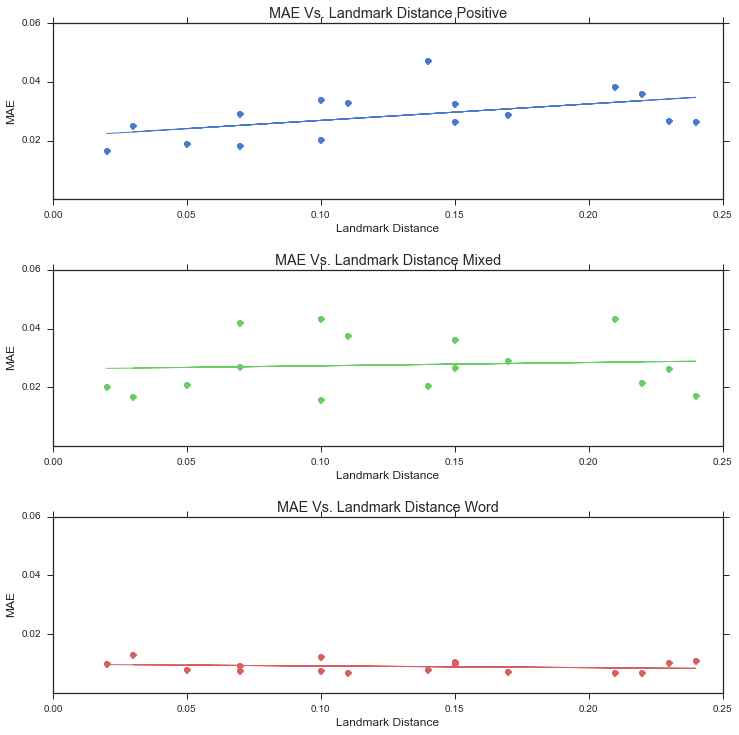

In [143]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land,error_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, error_1, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance Positive')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land,error_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, error_2, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance Mixed')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land,error_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, error_3, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

### Slope+,  Slope-,  Slopew

In [144]:
print m1, m2, m3

0.0560634328803 0.0111653525207 -0.00569320187581


In [145]:
from scipy.stats import linregress
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,error_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,error_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,error_3)

### r +,  r -,  r w

In [146]:
print 'r1', r1
print 'r2', r2
print 'r3', r3

r1 0.489805073834
r2 0.0814910926594
r3 -0.20336821028


### r^2 +,  r^2 -,  r^2 w

In [147]:
print 'r1sq', r1*r1
print 'r2sq', r2*r2
print 'r3sq', r3*r3

r1sq 0.239909010354
r2sq 0.00664079818283
r3sq 0.0413586289526


### p +,  p -,  p w

In [148]:
print 'p1', p1
print 'p2', p2
print 'p3', p3

p1 0.0541218855868
p2 0.764160467586
p3 0.449988739631


## Landmark Distance Vs. SD Error

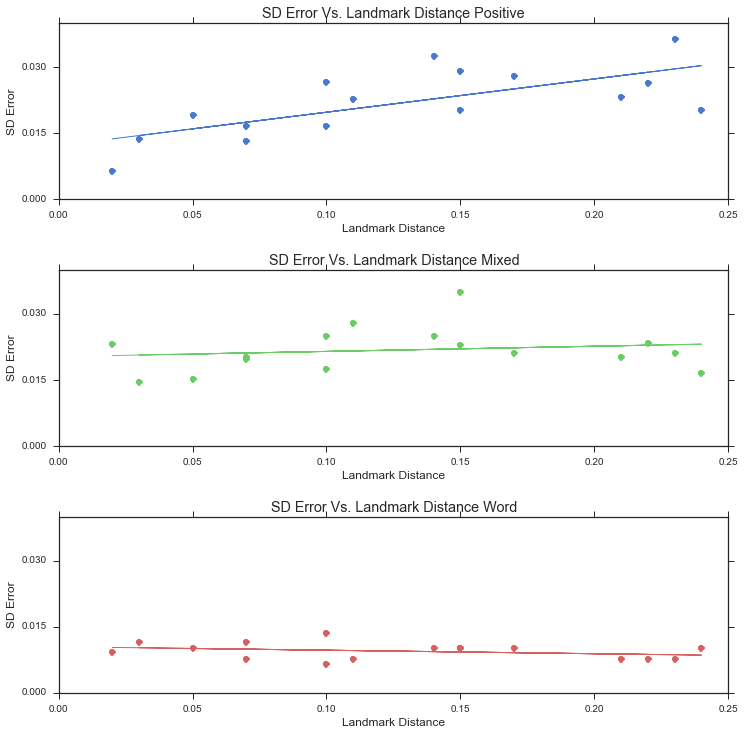

In [149]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land,SD_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, SD_1, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('SD Error Vs. Landmark Distance Positive')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

m2, b2 = np.polyfit(dist_Land,SD_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, SD_2, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('SD Error Vs. Landmark Distance Mixed')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

m3, b3 = np.polyfit(dist_Land,SD_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, SD_3, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('SD Error Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

plt.subplots_adjust(hspace=.4)

In [150]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [152]:
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,SD_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,SD_3)

In [153]:
print r1,r2,r3

0.693875000813 0.16550466699 -0.307840364664


In [154]:
print p1,p2,p3

0.00286751177413 0.540163565801 0.246082041193


## Estimation slope vs SAT scores

In [157]:
nline_df.to_csv('nline_data.csv', sep='\t')

### Save and open to create 'well formed' dataframe

In [158]:
new_df = pd.read_csv('nline_data.csv',sep='\t')

In [159]:
len(new_df)

3648

In [160]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [161]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [162]:
new_df['AbsError'] = np.abs(new_df['Error'])

In [163]:
new_df['BigError'] = 0
new_df.loc[new_df['AbsError']>0.15,'BigError'] = 1
new_df['BigError'].sum()

33

In [164]:
new_df['Dist0'] = new_df['Line_pct']

In [165]:
new_df['Dist50'] = abs(new_df['Dist0']-0.5)

In [166]:
new_df['Dist100'] = abs(new_df['Dist0']-1)

In [167]:
new_df['DistLand'] = new_df.loc[:,['Dist0', 'Dist50', 'Dist100']].min(axis=1)

In [168]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [169]:
error = group_task['Error'].mean()
response = group_task['Response'].mean()

In [170]:
response.loc['s_02003'].loc[1]

Line_pct
0.03    0.005874
0.07    0.087004
0.11    0.096916
0.21    0.171806
0.28    0.235683
0.33    0.266520
0.36    0.266520
0.45    0.484581
0.57    0.555066
0.60    0.627753
0.65    0.636564
0.74    0.799559
0.77    0.823789
0.85    0.865639
0.90    0.927313
0.98    1.000000
Name: Response, dtype: float64

In [171]:
response.loc['s_02003'].loc[1].index

Float64Index([0.03, 0.07, 0.11, 0.21, 0.28, 0.33, 0.36, 0.45, 0.57,  0.6, 0.65,
              0.74, 0.77, 0.85,  0.9, 0.98],
             dtype='float64', name=u'Line_pct')

In [172]:
subjs = new_df['Subject'].unique()
tasks = new_df['Task'].unique()

In [173]:
tasks

array([ 3.,  2.,  1.])

In [174]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0
error_dict = {}
position_dict = {}
results_list = []
for s in subjs:
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)      

/Users/frankanayet/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:1323: FutureWarning: scalar indexers for index type MultiIndex should be integers and not floating point
  key = self._convert_scalar_indexer(key, axis)


## Histogram slope subject estimates Task +

(0, 14)

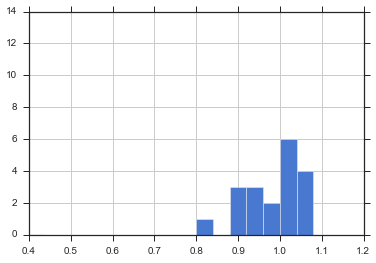

In [186]:
res_df['slope_P'][res_df['Task']==1].hist(bins=20, range=[0.4,1.2])
plt.ylim([0,14])

## Histogram slope subject estimates Task -

(0, 14)

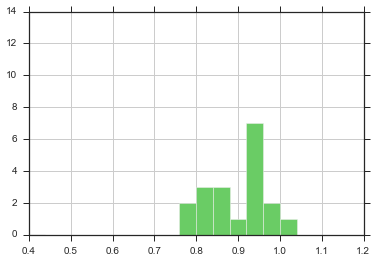

In [185]:
res_df['slope_P'][res_df['Task']==2].hist(bins=20, range=[0.4,1.2],color=pal[1])
plt.ylim([0,14])

## Histogram slope subject estimates Task w

(0, 14)

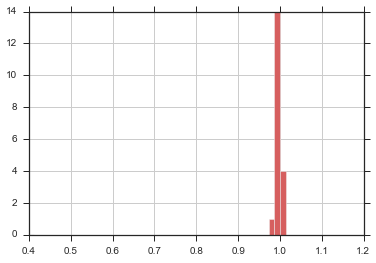

In [436]:
res_df['slope_P'][res_df['Task']==3].hist(bins=60, range=[0.4,1.2],color=pal[2])
plt.ylim([0,14])

In [187]:
math = pd.read_csv('Math_Results.csv')

In [188]:
res_df = pd.merge(res_df,math,on='Subject',how='inner')

##  Deviation from Linearity Vs. Math Score

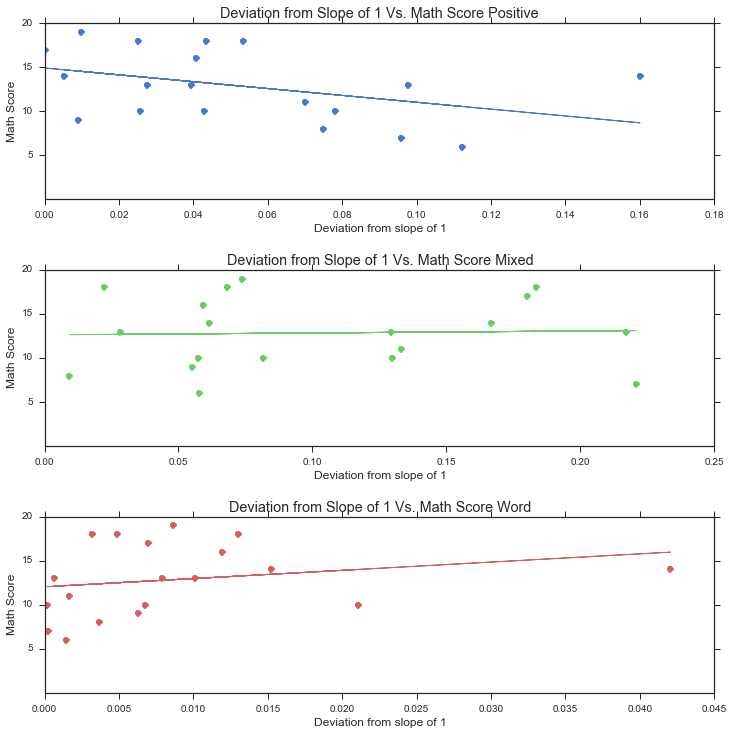

In [190]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==1] -1),
                    res_df['Math_Score'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==1] -1),
          res_df['Math_Score'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(abs(res_df['slope_P'][res_df['Task']==1] -1), 
         m1*abs(res_df['slope_P'][res_df['Task']==1] -1) + b1, '-', color=pal[0])
plt.title('Deviation from Slope of 1 Vs. Math Score Positive')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==2] -1),
                    res_df['Math_Score'][res_df['Task']==2],1)
#fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(abs(res_df['slope_P'][res_df['Task']==2] -1),
          res_df['Math_Score'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(abs(res_df['slope_P'][res_df['Task']==2] -1), 
         m2*abs(res_df['slope_P'][res_df['Task']==2] -1) + b2, '-', color=pal[1])
plt.title('Deviation from Slope of 1 Vs. Math Score Mixed')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

#handle nan
idx = np.isfinite(abs(res_df['slope_P'][res_df['Task']==3] -1)) & np.isfinite(res_df['Math_Score'][res_df['Task']==3])
m3, b3 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==3][idx] -1),
                    res_df['Math_Score'][res_df['Task']==3][idx],1)
#fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(abs(res_df['slope_P'][res_df['Task']==3] -1),
          res_df['Math_Score'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(abs(res_df['slope_P'][res_df['Task']==3] -1), 
         m3*abs(res_df['slope_P'][res_df['Task']==3] -1) + b3, '-', color=pal[2])
plt.title('Deviation from Slope of 1 Vs. Math Score Word')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.subplots_adjust(hspace=.4)

This results was not replicated during our behavioral replication with another 40 subjects

In [191]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [192]:
slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_P'][res_df['Task']==1]-1),
                                                 res_df['Math_Score'][res_df['Task']==1])
slope2, intercept2, r2, p2, stderr2 = linregress(abs(res_df['slope_P'][res_df['Task']==2]-1),
                                                 res_df['Math_Score'][res_df['Task']==2])
slope3, intercept3, r3, p3, stderr3 = linregress(abs(res_df['slope_P'][res_df['Task']==3]-1),
                                                 res_df['Math_Score'][res_df['Task']==3])

### r +, r -, r w

In [194]:
print r1, r2, r3

-0.404005962253 0.0362799911319 0.226959191254


### R^2 +, R^2 -, R^2 w

In [195]:
print r1*r1, r2*r2, r3*r3

0.163220817536 0.00131623775653 0.0515104744945


### p-value +, p-value -, p-value w

In [196]:
print p1, p2, p3

0.0862565172146 0.88277481974 0.350095507927


## Slope Vs Intercept

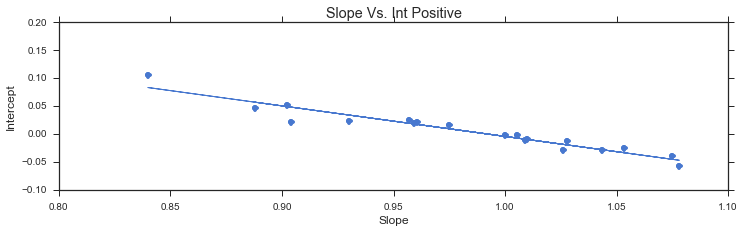

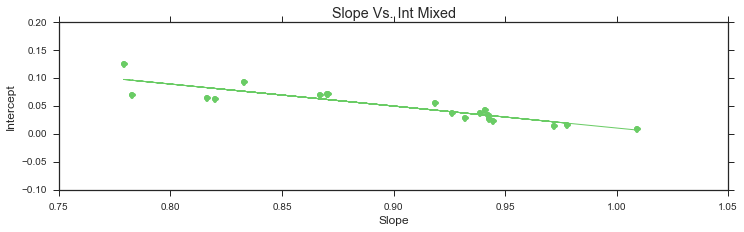

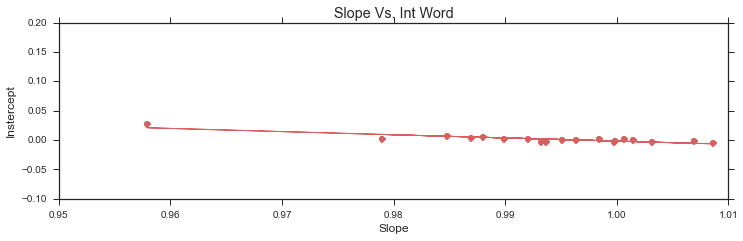

In [197]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(res_df['slope_P'][res_df['Task']==1],
                    res_df['int_P'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(res_df['slope_P'][res_df['Task']==1],
          res_df['int_P'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(res_df['slope_P'][res_df['Task']==1], 
         m1*res_df['slope_P'][res_df['Task']==1] + b1, '-', color=pal[0])
plt.title('Slope Vs. Int Positive')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))

m2, b2 = np.polyfit(res_df['slope_P'][res_df['Task']==2],
                    res_df['int_P'][res_df['Task']==2],1)
fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(res_df['slope_P'][res_df['Task']==2],
          res_df['int_P'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(res_df['slope_P'][res_df['Task']==2], 
         m2*res_df['slope_P'][res_df['Task']==2] + b2, '-', color=pal[1])
plt.title('Slope Vs. Int Mixed')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))


m3, b3 = np.polyfit(res_df['slope_P'][res_df['Task']==3],
                    res_df['int_P'][res_df['Task']==3],1)
fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(res_df['slope_P'][res_df['Task']==3],
          res_df['int_P'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(res_df['slope_P'][res_df['Task']==3], 
         m3*res_df['slope_P'][res_df['Task']==3] + b3, '-', color=pal[2])
plt.title('Slope Vs. Int Word')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Instercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))
plt.subplots_adjust(hspace=.4)

In [198]:
res_df.Subject.unique()

array(['s_02003', 's_02007', 's_02006', 's_02005', 's_02004', 's_02018',
       's_02019', 's_02010', 's_02011', 's_02012', 's_02014', 's_02015',
       's_02016', 's_02017', 's_02024', 's_02027', 's_02021', 's_02023',
       's_02022'], dtype=object)

## Scatter plots for individual subjects

In [204]:
new_math_df = pd.merge(new_df,math,on='Subject',how='inner')

In [205]:
ordered = res_df[['Subject', 'Math_Score']][res_df['Task']==1]
ordered_math = ordered.sort_values(by='Math_Score', ascending=False)

In [206]:
table_order = ordered_math.Subject

# Positive Task

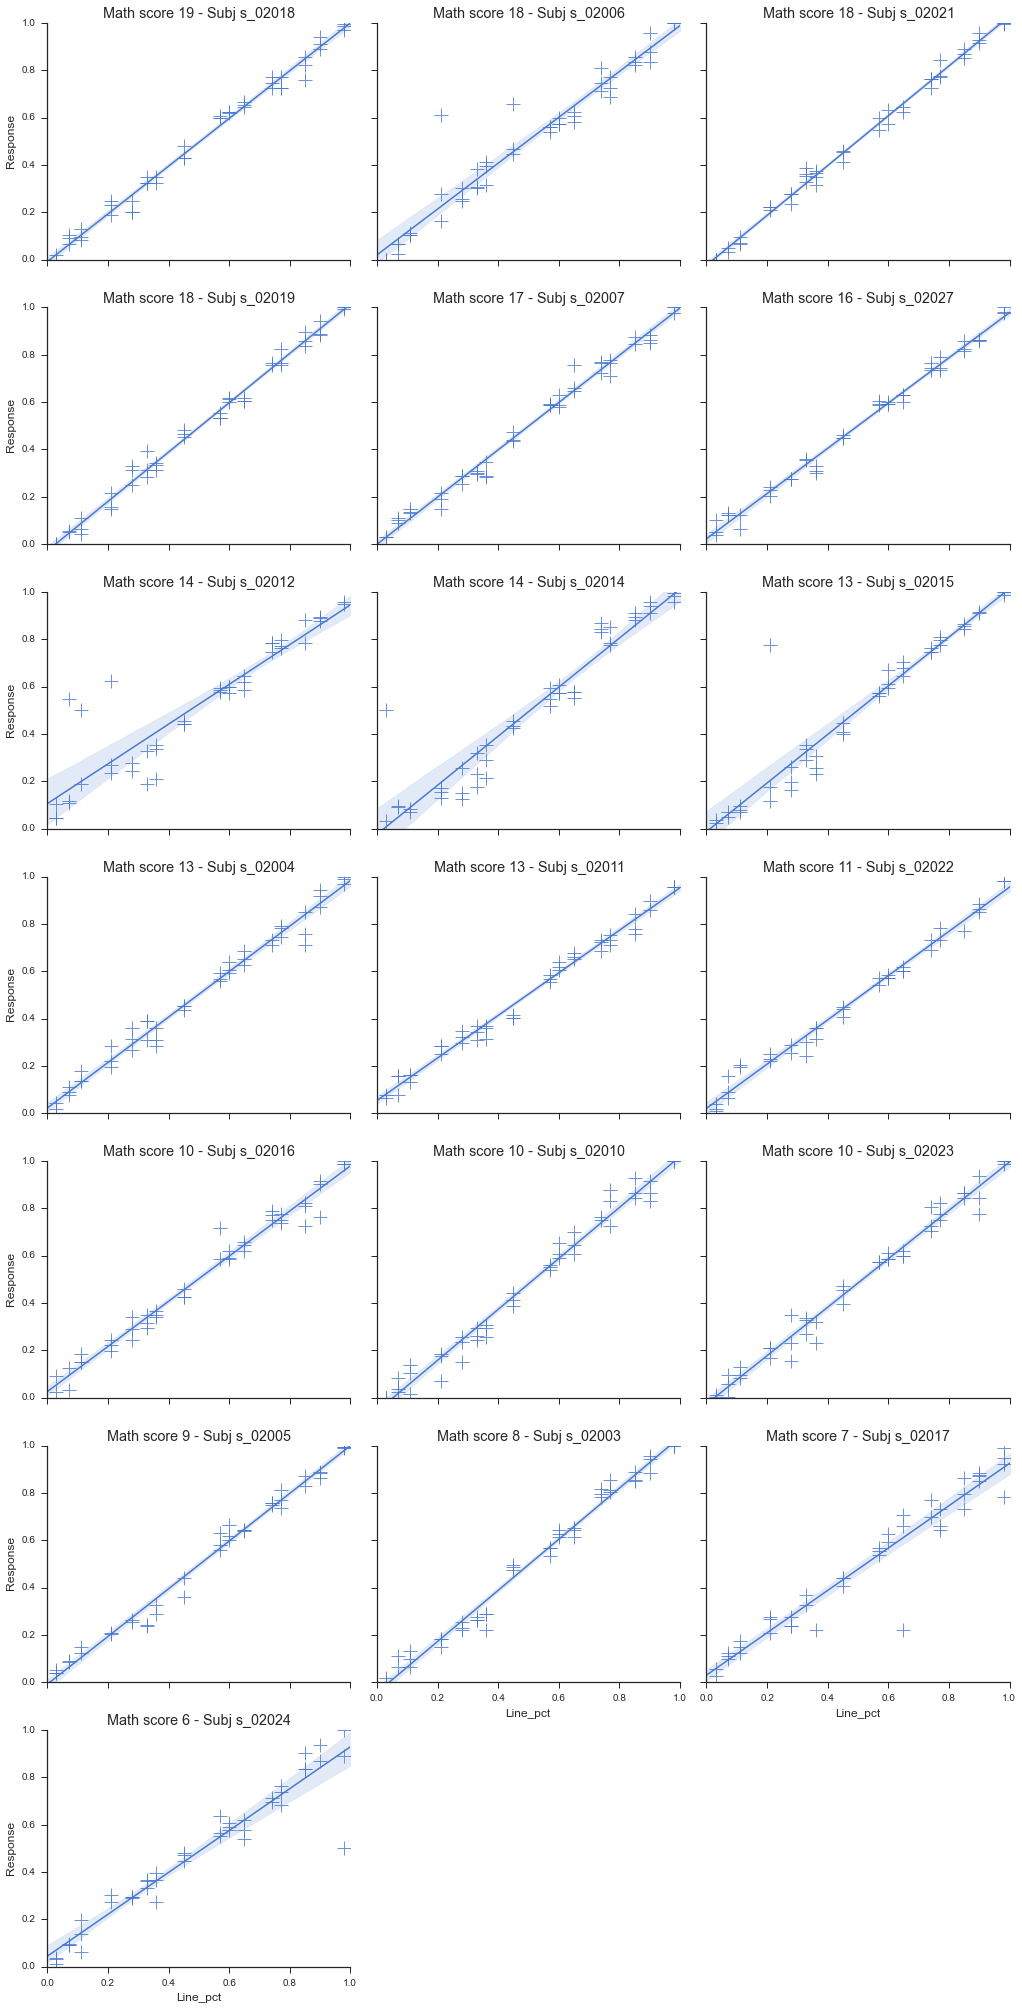

In [207]:
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==1],markers=['+'],
               col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200, 'color':pal[0]},
              line_kws={'color':pal[0]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Positive.png')

# Mixed Task

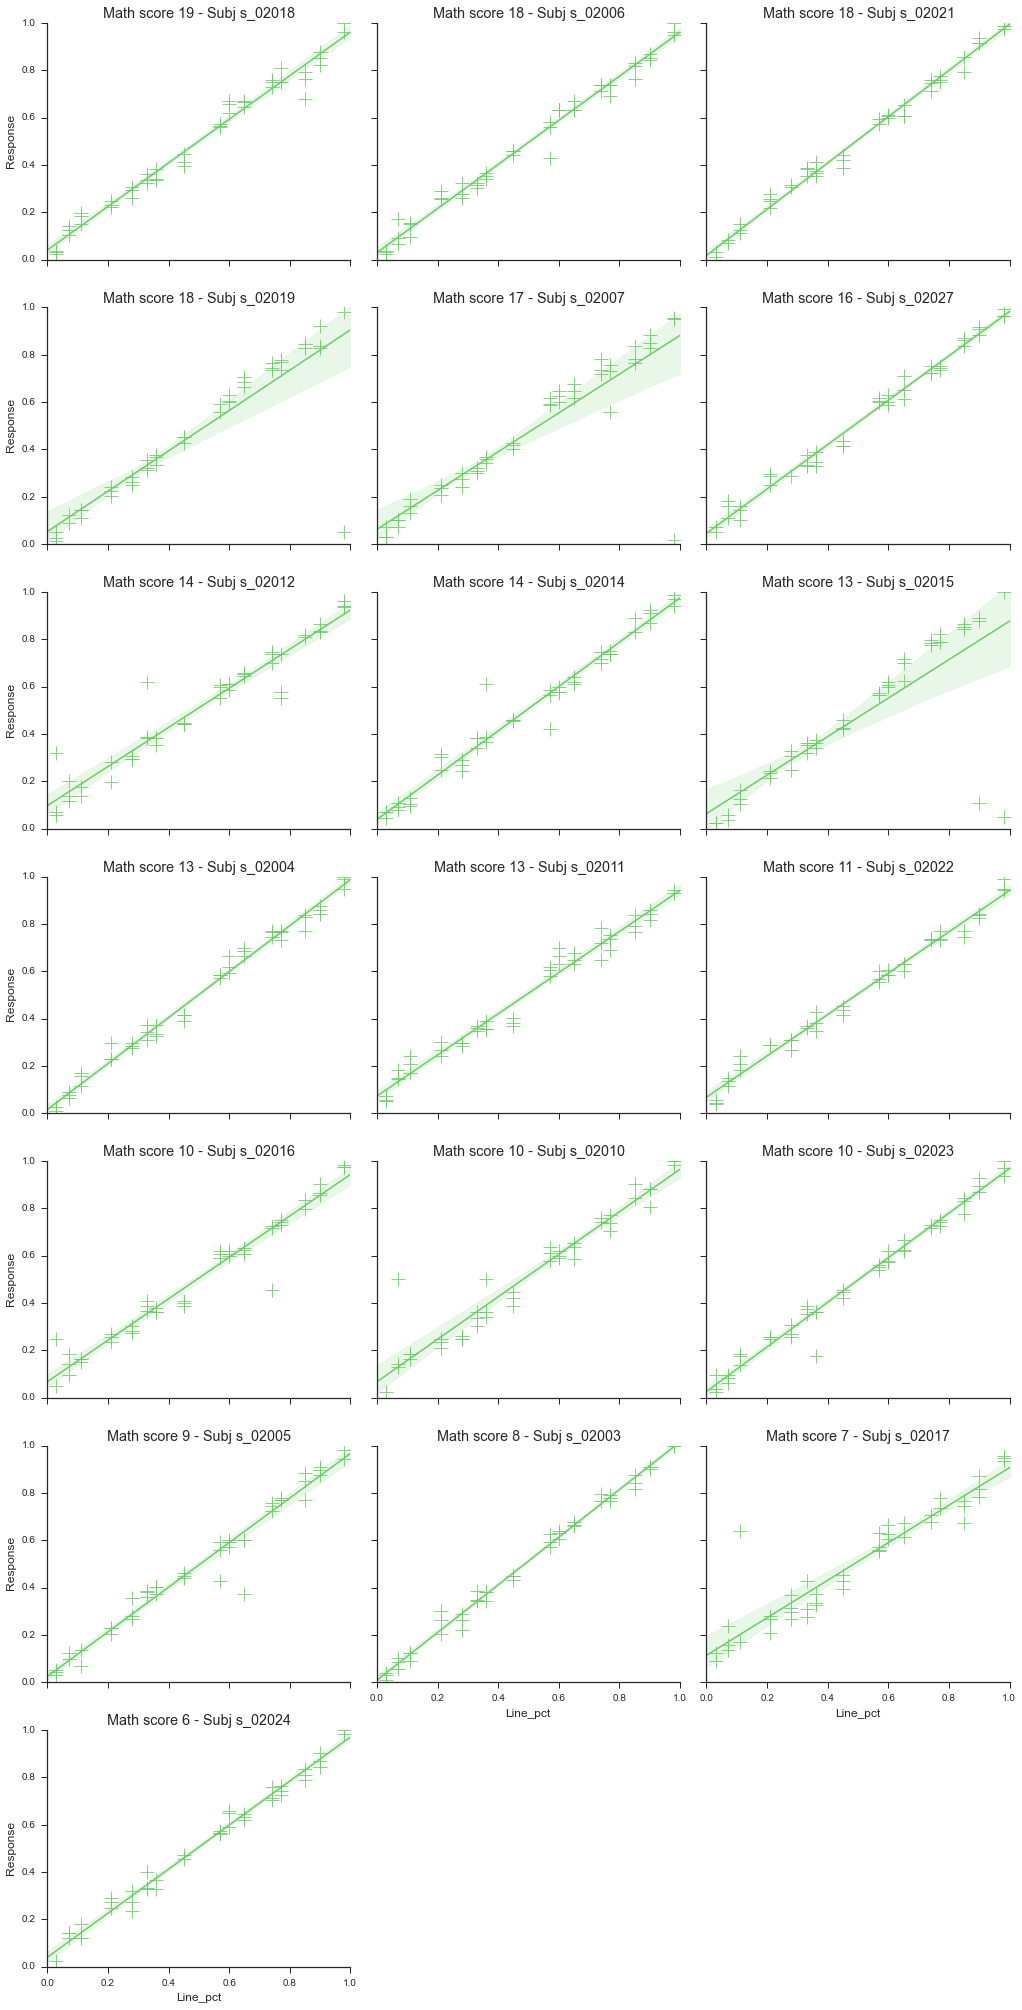

In [208]:
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==2],
               markers=['+'],col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200,'color':pal[1]},
              line_kws={'color':pal[1]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Negative.png')

## Signed Error Vs. Presented Position Positive Task (4th order polynomial fit)

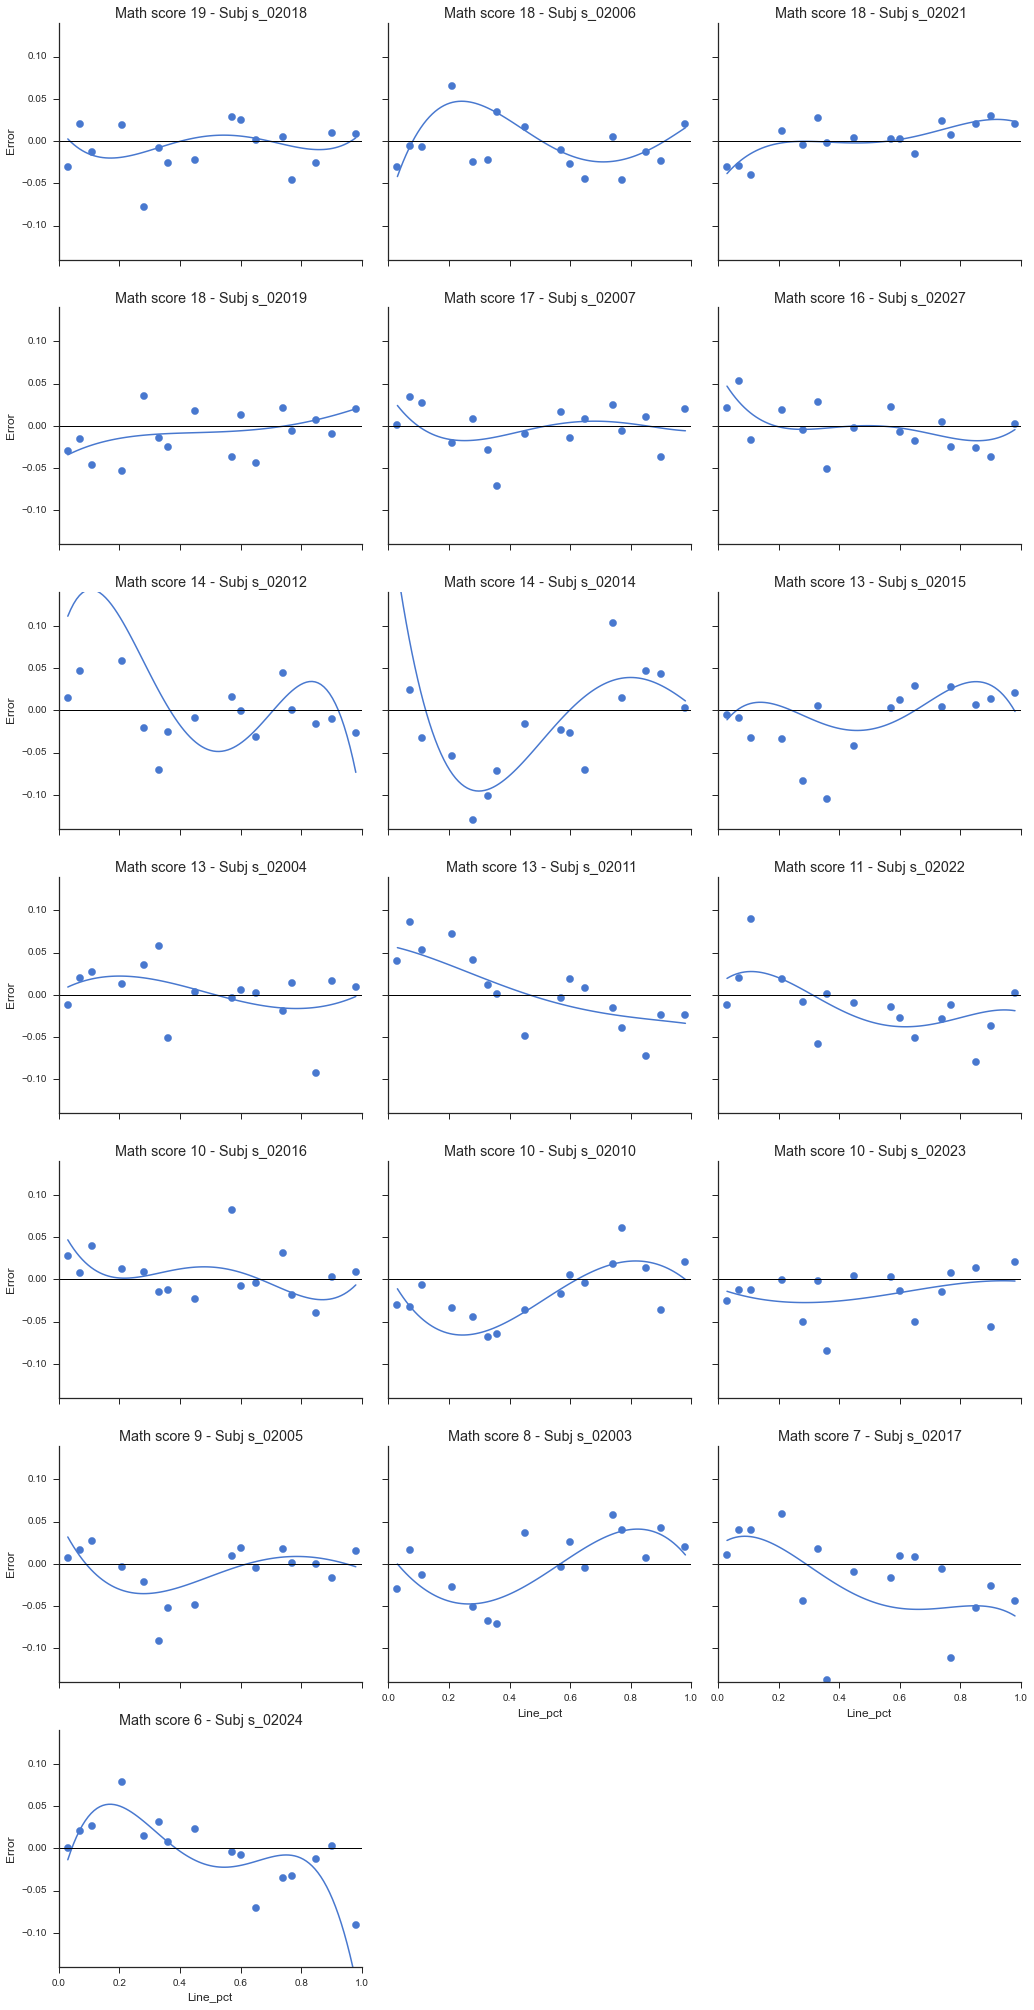

In [211]:
g = sns.FacetGrid(new_math_df[new_math_df['Task']==1],col='Subject',col_wrap=3,
                  col_order=ordered_math['Subject'],size=4,aspect=1.2)
g = (g.map(sns.regplot, 'Line_pct', 'Error',order=4,truncate=True,ci=None,x_estimator=np.median,
          scatter=True,color=pal[0]).set(ylim=(-0.14,0.14),xlim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.plot((0,1),(0,0),c='black')
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1

## Mixed Task

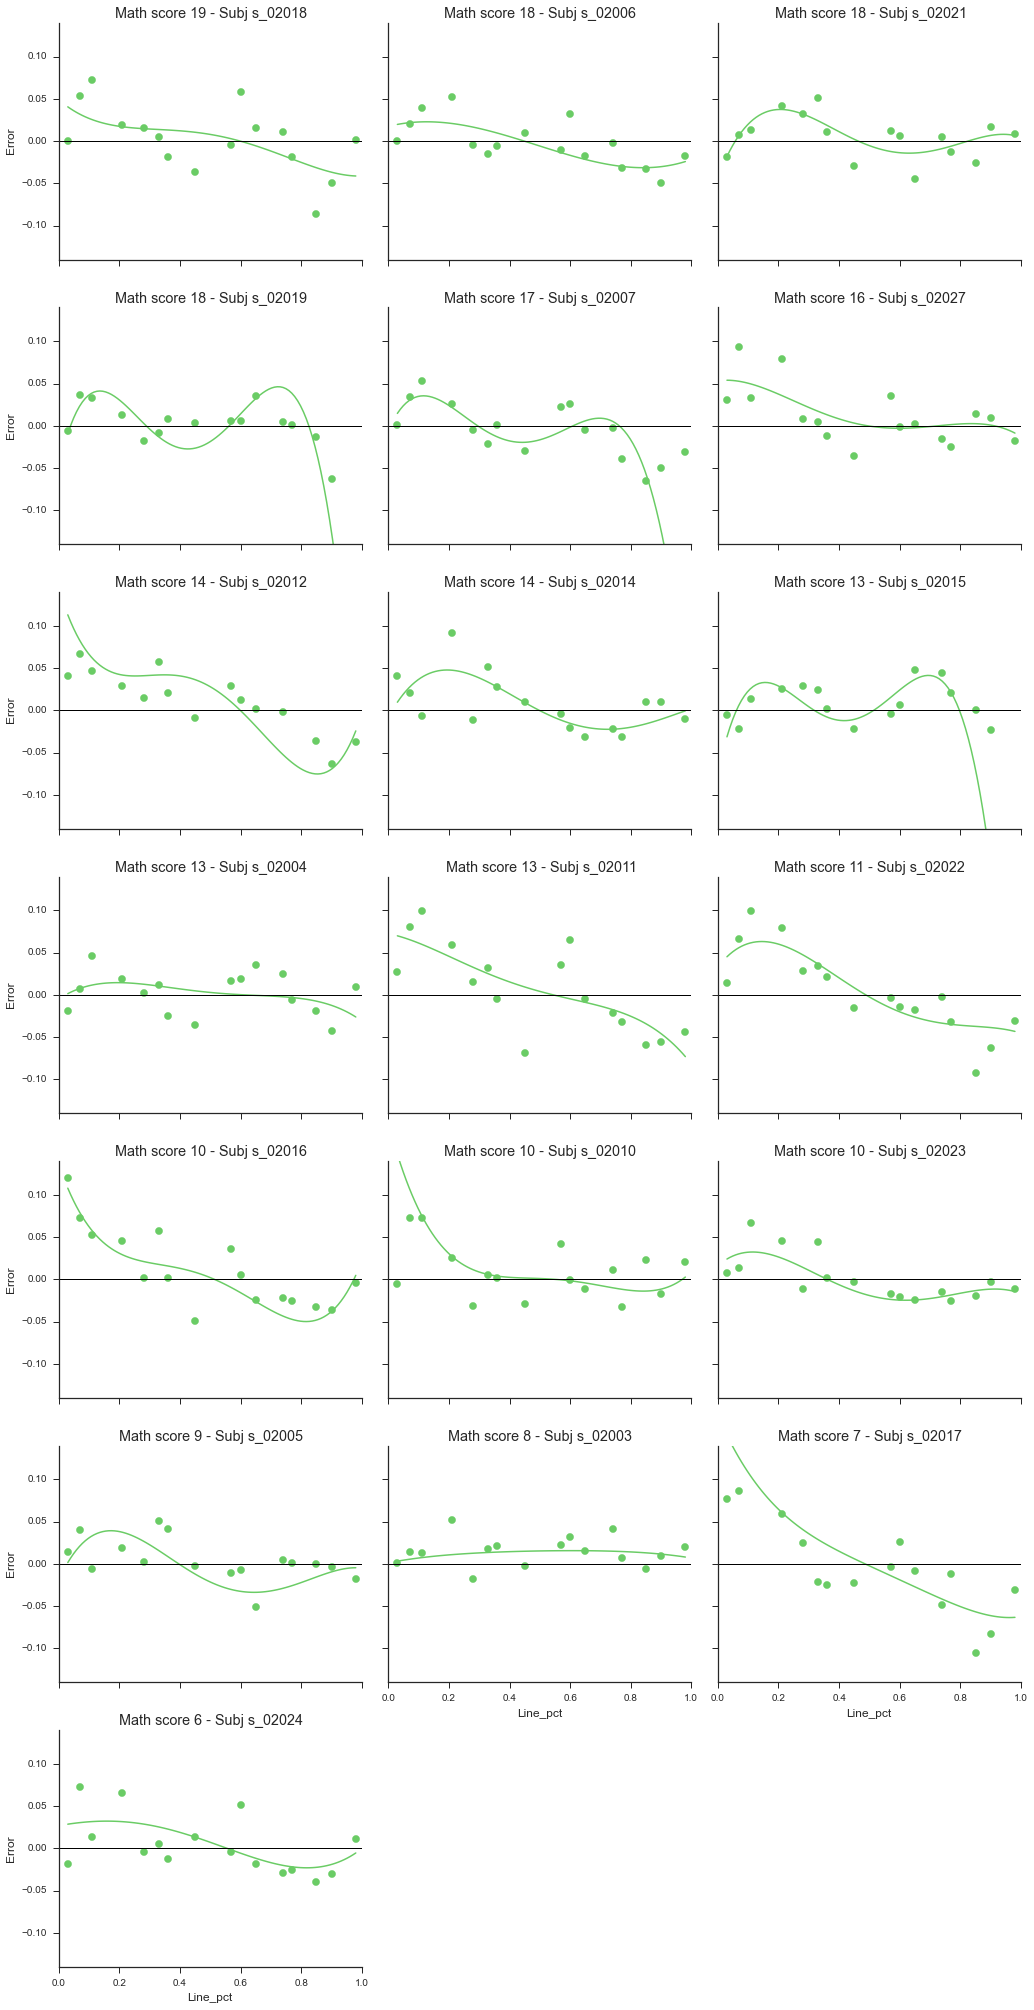

In [213]:
g = sns.FacetGrid(new_math_df[new_math_df['Task']==2],col='Subject',col_wrap=3,
                  col_order=ordered_math['Subject'],size=4,aspect=1.2)
g = (g.map(sns.regplot, 'Line_pct', 'Error',order=4,truncate=True,ci=None,x_estimator=np.median,
          scatter=True,color=pal[1]).set(ylim=(-0.14,0.14),xlim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.plot((0,1),(0,0),c='black')
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1

## SD Error Vs. Position Positive task

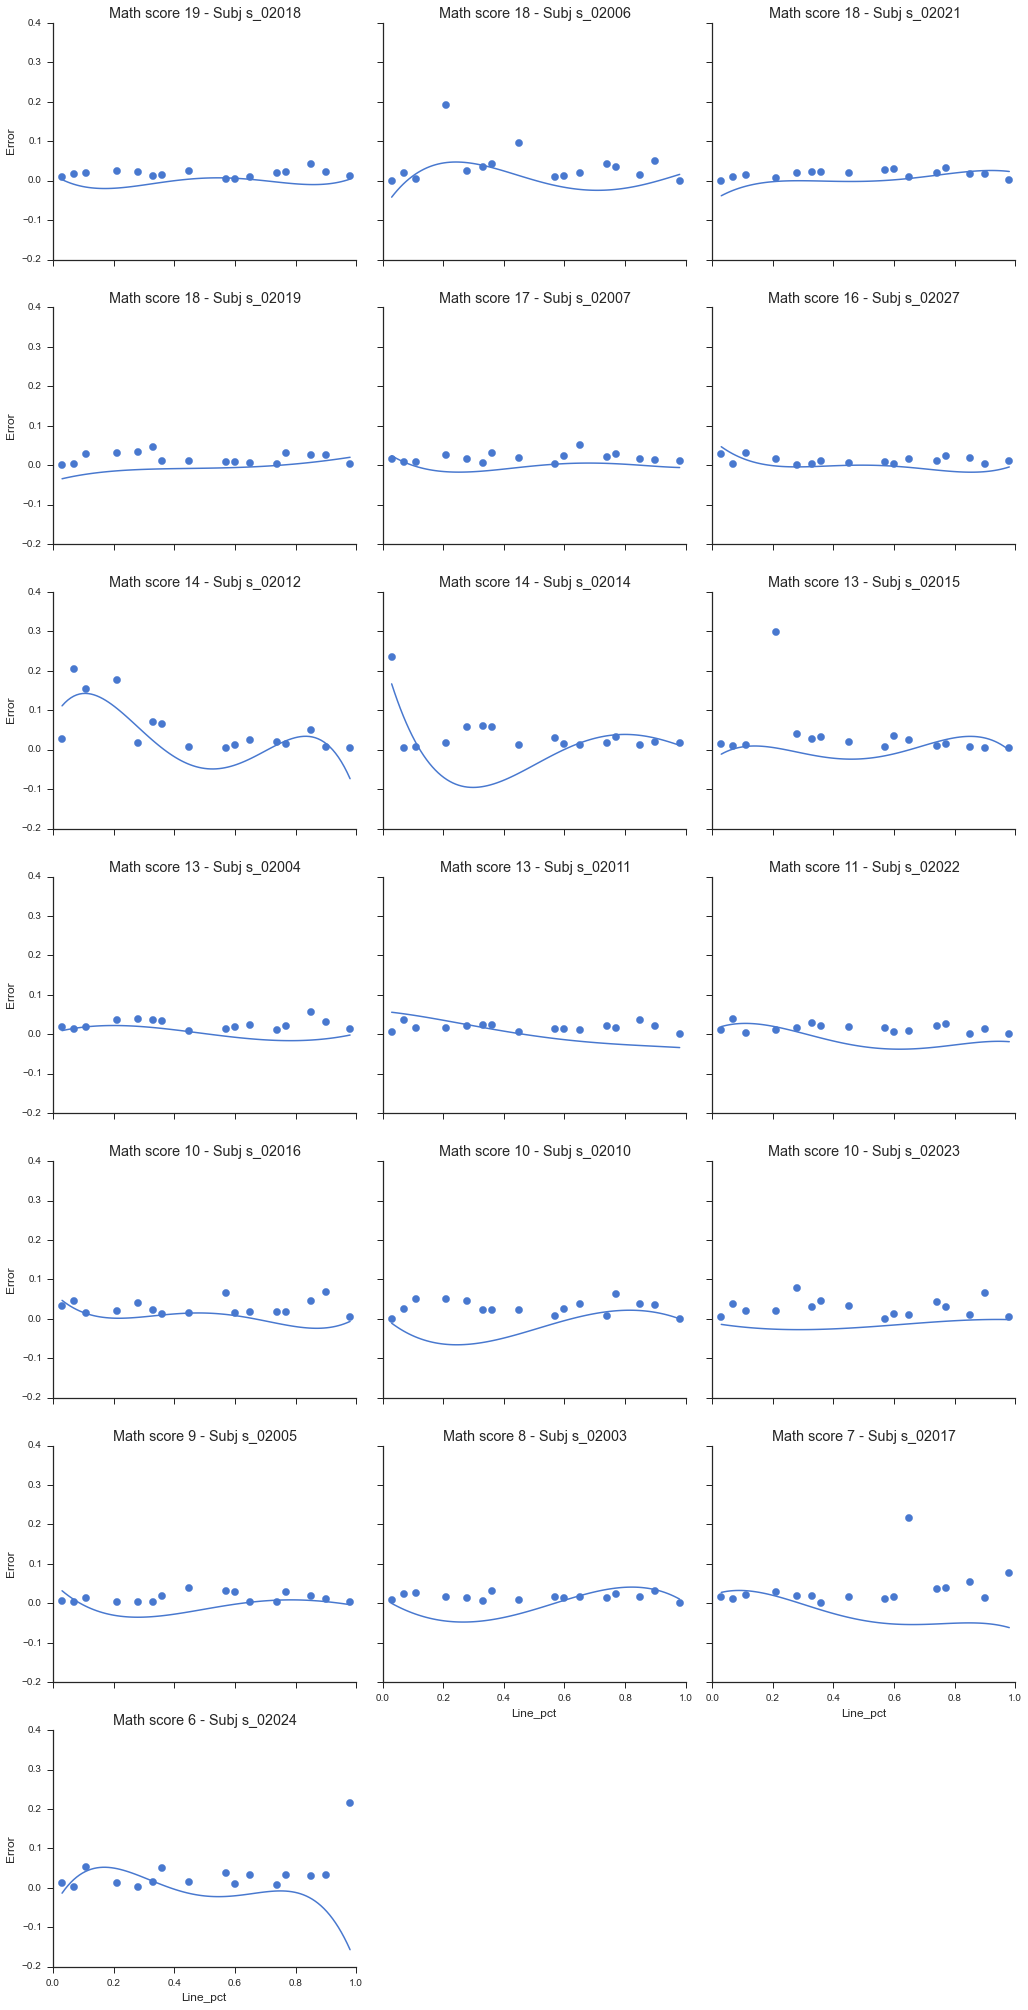

In [214]:
g = sns.FacetGrid(new_math_df[new_math_df['Task']==1],col='Subject',col_wrap=3,
                  col_order=ordered_math['Subject'],size=4,aspect=1.2)
g = (g.map(sns.regplot, 'Line_pct', 'Error',order=4,truncate=True,ci=None,x_estimator=np.std,
          scatter=True,color=pal[0]).set(xlim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1

## Mixed Task

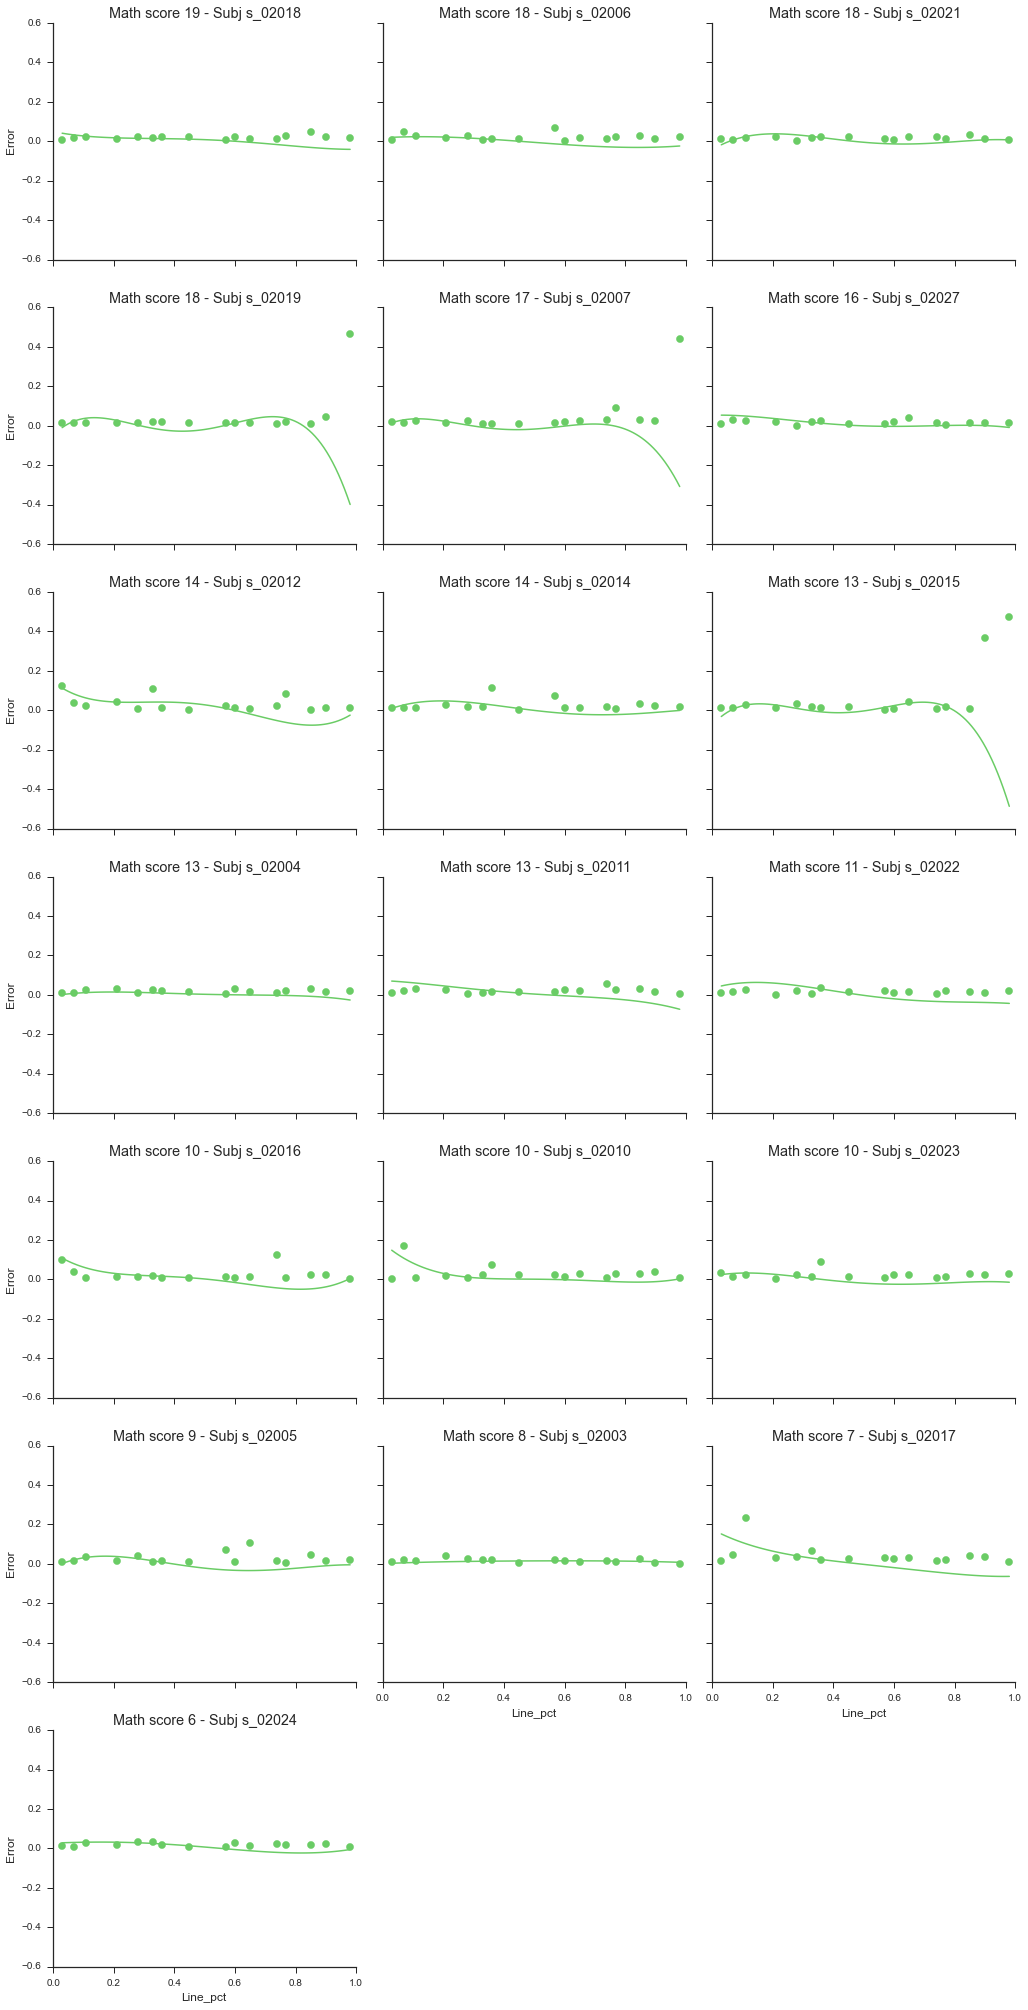

In [216]:
g = sns.FacetGrid(new_math_df[new_math_df['Task']==2],col='Subject',col_wrap=3,
                  col_order=ordered_math['Subject'],size=4,aspect=1.2)
g = (g.map(sns.regplot, 'Line_pct', 'Error',order=4,truncate=True,ci=None,x_estimator=np.std,
          scatter=True,color=pal[1]).set(xlim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1

## Make Result Table

In [372]:
group_task_t = new_df.groupby(['Subject', 'Task'])

In [373]:
np.sort(new_df['Subject'].unique())

array(['s_02003', 's_02004', 's_02005', 's_02006', 's_02007', 's_02010',
       's_02011', 's_02012', 's_02014', 's_02015', 's_02016', 's_02017',
       's_02018', 's_02019', 's_02021', 's_02022', 's_02023', 's_02024',
       's_02027'], dtype=object)

In [374]:
len(new_df)

2557

In [375]:
results_df = pd.DataFrame(new_df[new_df['Task']==1].groupby('Subject')['RT'].median())
results_df.columns = ['RT+']
results_df['RT-'] = new_df[new_df['Task']==2].groupby('Subject')['RT'].median()
results_df['RTw'] = new_df[new_df['Task']==3].groupby('Subject')['RT'].median()

### Commented out because there are no big errors in the fMRI sample

In [376]:
#results_df['E+'] = new_df[new_df['Task']==1].groupby('Subject')['BigError'].sum()
#results_df['E-'] = new_df[new_df['Task']==2].groupby('Subject')['BigError'].sum()
#results_df['Ew'] = new_df[new_df['Task']==3].groupby('Subject')['BigError'].sum()

In [377]:
new_df.loc[:,:] = new_df.loc[new_df['BigError']==0,:]

In [378]:
new_df= new_df[pd.notnull(new_df['Subject'])]
len(new_df)

2557

In [379]:
np.sort(new_df['Subject'].unique())

array(['s_02003', 's_02004', 's_02005', 's_02006', 's_02007', 's_02010',
       's_02011', 's_02012', 's_02014', 's_02015', 's_02016', 's_02017',
       's_02018', 's_02019', 's_02021', 's_02022', 's_02023', 's_02024',
       's_02027'], dtype=object)

In [380]:
sds = []
for sub in np.sort(new_df['Subject'].unique()):
    grouped = new_df.loc[new_df['Subject']==sub].groupby(['Task', 'Line_pct'])
    for pos in grouped.groups.keys():
        task = pos[0]
        stim = pos[1]
        tmp = grouped.get_group((task,stim))['Error']
        tmp = np.nanstd(tmp)
        sds.append({'Subject':sub, 'Task':task, 'Line_pct':stim,
             'SD':tmp})
SD_df = pd.DataFrame(sds)
results_df['SD+'] = SD_df[SD_df['Task']==1].groupby('Subject')['SD'].mean()
results_df['SD-'] = SD_df[SD_df['Task']==2].groupby('Subject')['SD'].mean()
results_df['SDw'] = SD_df[SD_df['Task']==3].groupby('Subject')['SD'].mean()

In [381]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [382]:
error = group_task['AbsError'].median()
response = group_task['Response'].median()

In [383]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0
error_dict = {}
position_dict = {}
results_list = []
for s in np.sort(new_df['Subject'].unique()):
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)      

In [384]:
r2_1 = res_df[['Subject','R2_P']][res_df['Task']==1]
r2_1.columns = ['Subject', 'R^2+']
results_df = results_df.join(r2_1.groupby('Subject').mean(), how='inner')

In [385]:
r2_2 = res_df[['Subject','R2_P']][res_df['Task']==2]
r2_2.columns = ['Subject', 'R^2-']
results_df = results_df.join(r2_2.groupby('Subject').mean(), how='inner')

In [386]:
r2_3 = res_df[['Subject','R2_P']][res_df['Task']==3]
r2_3.columns = ['Subject', 'R^2w']
results_df = results_df.join(r2_3.groupby('Subject').mean(), how='inner')

In [387]:
slope_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
slope_1.columns = ['Subject', 'slope+']
results_df = results_df.join(slope_1.groupby('Subject').mean(), how='inner')
slope_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
slope_2.columns = ['Subject', 'slope-']
results_df = results_df.join(slope_2.groupby('Subject').mean(), how='inner')
slope_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
slope_3.columns = ['Subject', 'slopew']
results_df = results_df.join(slope_3.groupby('Subject').mean(), how='inner')

In [388]:
PAE1 = new_df[new_df['Task']==1].groupby(['Subject', 'Line_pct'])['AbsError'].median()
PAE2 = new_df[new_df['Task']==2].groupby(['Subject', 'Line_pct'])['AbsError'].median()
PAE3 = new_df[new_df['Task']==3].groupby(['Subject', 'Line_pct'])['AbsError'].median()

In [389]:
SD1 = SD_df[SD_df.Task == 1].groupby(['Subject', 'Line_pct'])['SD'].mean()
SD2 = SD_df[SD_df.Task == 2].groupby(['Subject', 'Line_pct'])['SD'].mean()
SD3 = SD_df[SD_df.Task == 3].groupby(['Subject', 'Line_pct'])['SD'].mean()

In [390]:
corrs1 = []
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
for sub in SD1.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD1.loc[sub])
    corrs1.append({'Subject':sub, 'SD_Lan_+':r1})
DE1 = pd.DataFrame(corrs1)
results_df = results_df.join(DE1.groupby('Subject').mean(), how='inner')

In [391]:
corrs2 = []
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
for sub in SD2.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD2.loc[sub])
    corrs2.append({'Subject':sub, 'SD_Lan_-':r1})
DE2 = pd.DataFrame(corrs2)
results_df = results_df.join(DE2.groupby('Subject').mean(), how='inner')

In [392]:
abs(SD3.loc['s_02017'].keys()-.5)

Float64Index([0.47, 0.43, 0.39, 0.29, 0.22, 0.17, 0.14, 0.05, 0.07,  0.1, 0.15,
              0.24, 0.27, 0.35,  0.4],
             dtype='float64', name=u'Line_pct')

In [393]:
corrs3 = []
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
for sub in SD3.index.levels[0]:
    zero = SD3.loc[sub].keys()
    mid = abs(SD3.loc[sub].keys()-.5)
    end = abs(SD3.loc[sub].keys()-1)
    dist_Land = pd.DataFrame([zero, mid, end]).min()
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD3.loc[sub])
    corrs3.append({'Subject':sub, 'SD_Lan_w':r1})
DE3 = pd.DataFrame(corrs3)
results_df = results_df.join(DE3.groupby('Subject').mean(), how='inner')

In [394]:
miss_df = pd.read_csv('nline_data.csv',sep='\t')
miss_df.loc[:,:]= miss_df[miss_df['catch']<1]
#len(nline_miss)
miss_df['Missed'] = miss_df['Error']
miss_df.loc[miss_df['Missed']<1,'Missed'] = 0
miss_df = miss_df[pd.notnull(miss_df['Subject'])]

In [395]:
results_df['Miss+'] = miss_df[miss_df['Task']==1].groupby('Subject')['Missed'].sum()
results_df['Miss-'] = miss_df[miss_df['Task']==2].groupby('Subject')['Missed'].sum()
results_df['Missw'] =miss3 = miss_df[miss_df['Task']==3].groupby('Subject')['Missed'].sum()

In [396]:
math.columns = ['Subject', 'SAT']
results_df = results_df.join(math.groupby('Subject').mean(), how='inner')

Sort columns to make viewing easier

In [397]:
cols = results_df.columns.tolist()
cols = cols[-1:] + cols[-4:-1] + cols[0:-4]
results_df = results_df[cols]

In [398]:
results_df.loc[:,'AbsError+'] = new_df[new_df['Task']==1].groupby('Subject')['AbsError'].median()
results_df.loc[:,'AbsError-'] = new_df[new_df['Task']==2].groupby('Subject')['AbsError'].median()
results_df.loc[:,'AbsErrorw'] = new_df[new_df['Task']==3].groupby('Subject')['AbsError'].median()

In [437]:
results_df.loc[:,'Error+'] = new_df[new_df['Task']==1].groupby('Subject')['Error'].median()
results_df.loc[:,'Error-'] = new_df[new_df['Task']==2].groupby('Subject')['Error'].median()
results_df.loc[:,'Errorw'] = new_df[new_df['Task']==3].groupby('Subject')['Error'].median()

In [399]:
linear_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
linear_1.loc[:,'slope_P'] = abs(linear_1['slope_P'] - 1)
linear_1.columns = ['Subject', 'linearity+']
results_df = results_df.join(linear_1.groupby('Subject').mean(), how='inner')
linear_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
linear_2.loc[:,'slope_P'] = abs(linear_2['slope_P'] - 1)
linear_2.columns = ['Subject', 'linearity-']
results_df = results_df.join(linear_2.groupby('Subject').mean(), how='inner')
linear_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
linear_3.loc[:,'slope_P'] = abs(linear_3['slope_P'] - 1)
linear_3.columns = ['Subject', 'linearityw']
results_df = results_df.join(linear_3.groupby('Subject').mean(), how='inner')

In [438]:
results_df

,SAT,Miss+,Miss-,Missw,RT+,RT-,RTw,SD+,SD-,SDw,...,SD_Lan_w,AbsError+,AbsError-,AbsErrorw,linearity+,linearity-,linearityw,Error+,Error-,Errorw
Subject,,,,,,,,,,,,,,,,,,,,,
s_02003,8,1,2,4,2.255009,2.220295,2.362406,0.016652,0.016129,0.006453,...,-0.538466,0.036784,0.017952,0.006916,0.074517,0.002188,0.008247,-0.003921,0.010551,0.000881
s_02004,13,1,0,2,2.062043,2.234014,2.295116,0.024540,0.017868,0.005431,...,0.524212,0.020749,0.019802,0.006784,0.034275,0.015330,0.006855,0.003744,0.003590,-0.001960
s_02005,9,8,3,6,2.542199,2.390150,2.279069,0.013788,0.019781,0.007235,...,0.055355,0.017225,0.018392,0.006476,0.011439,0.041215,0.007814,0.000088,0.002159,-0.005727
s_02006,18,1,0,1,1.928688,1.927987,1.976927,0.023140,0.020421,0.008927,...,-0.268152,0.026211,0.020154,0.008546,0.004327,0.059994,0.003737,-0.010529,-0.005947,0.000132
s_02007,17,1,0,0,2.175922,2.210661,1.962051,0.018342,0.017772,0.005760,...,-0.565137,0.020573,0.024802,0.005859,0.001566,0.068521,0.009591,0.000837,-0.001498,0.001079
s_02010,10,1,4,2,1.844458,1.726596,1.728810,0.028299,0.020687,0.017804,...,0.112886,0.032555,0.020000,0.017313,0.063236,0.033273,0.012333,-0.027181,0.001233,-0.005176
s_02011,13,2,1,4,2.143631,2.125858,2.218781,0.017647,0.020092,0.008977,...,-0.076196,0.031145,0.040485,0.008546,0.114885,0.124170,0.004409,0.003855,0.015154,0.002533
s_02012,14,5,3,7,2.413394,2.354387,2.230194,0.017885,0.013864,0.006071,...,-0.038352,0.023348,0.027269,0.006256,0.045419,0.103139,0.001687,-0.000881,0.004493,-0.002335
s_02014,14,3,1,3,2.209955,2.168760,2.259560,0.021720,0.019380,0.006647,...,0.249341,0.030286,0.020507,0.007489,0.071701,0.055613,0.014368,-0.006894,0.005793,-0.000749


In [401]:
results_df.to_excel('Results Table.xlsx', index_label='Subject', merge_cells=False)

# Task contrasts for main variables

In [443]:
from scipy.stats import ttest_rel
import pyvttbl as pt

In [475]:
aov_df = pt.DataFrame()

In [476]:
conditions = {'RT': ['RT+', 'RT-', 'RTw'],'AbsError':['AbsError+', 'AbsError-', 'AbsErrorw'],
              'Error':['Error+', 'Error-', 'Errorw'],'SD':['SD+', 'SD-', 'SDw']}
for index, row in results_df.iterrows():
    for task in range(0,3):
        tmp = {'Sub': index}
        for cond in conditions.keys():
            tmp[cond] = row[conditions[cond][task]]
            cond_name = cond+'_cond'
            tmp[cond_name] = conditions[cond][task]
        aov_df.insert(tmp)

## RT

In [480]:
aov = aov_df.anova('RT', sub='Sub', wfactors=['RT_cond'])
print(aov)

RT ~ RT_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: RT
    Source                            Type III    eps      df      MS       F     Sig.    et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                         SS                                                                                        Power 
RT_cond          Sphericity Assumed      0.022       -        2   0.011   1.482   0.241   0.014     19   0.021    0.040    1.564   0.173 
                 Greenhouse-Geisser      0.022   0.829    1.658   0.013   1.482   0.243   0.014     19   0.021    0.040    1.564   0.160 
                 Huynh-Feldt             0.022   0.829    1.658   0.013   1.482   0.243   0.014     19   0.021    0.040    1.564   0.160 
                 Box                     0.022   0.500        1   0.022   1.482   0.239   0.014     19   0.021    0.040    1.564   0.133 
----------------------------------------------------------------------------------------------------------------

In [423]:
ttest_rel(results_df['RT+'], results_df['RT-'])

Ttest_relResult(statistic=0.16524082046143859, pvalue=0.87059608666737454)

In [424]:
ttest_rel(results_df['RT+'], results_df['RTw'])

Ttest_relResult(statistic=1.3145335986796769, pvalue=0.2051710092869003)

In [425]:
ttest_rel(results_df['RT-'], results_df['RTw'])

Ttest_relResult(statistic=1.4826397200011379, pvalue=0.15546713252199107)

No differences between tasks in the fMRI task but signicant differences between bnumber tasks and wiord task in the behavioral replication

## MAE

In [481]:
aov = aov_df.anova('AbsError', sub='Sub', wfactors=['AbsError_cond'])
print(aov)

AbsError ~ AbsError_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: AbsError
       Source                               Type III     eps      df        MS         F        Sig.      et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                               SS                                                                                                  Power 
AbsError_cond          Sphericity Assumed       0.003       -        2       0.002   76.752   1.038e-13   2.436     19   0.001    0.002   81.016   1.000 
                       Greenhouse-Geisser       0.003   0.632    1.264       0.003   76.752   1.916e-09   2.436     19   0.001    0.002   81.016   1.000 
                       Huynh-Feldt              0.003   0.632    1.264       0.003   76.752   1.916e-09   2.436     19   0.001    0.002   81.016   1.000 
                       Box                      0.003   0.500        1       0.003   76.752   6.565e-08   2.436     19   0.001    0.002   81.016   1.000

In [426]:
ttest_rel(results_df['AbsError+'], results_df['AbsError-'])

Ttest_relResult(statistic=0.81081805512254024, pvalue=0.42806129435355156)

In [427]:
ttest_rel(results_df['AbsError+'], results_df['AbsErrorw'])

Ttest_relResult(statistic=14.433006491184994, pvalue=2.4519013870074307e-11)

In [428]:
ttest_rel(results_df['AbsError-'], results_df['AbsErrorw'])

Ttest_relResult(statistic=9.3877557204938746, pvalue=2.3399400324951443e-08)

Significant differences between both number tasks and the word task in fMRI task and behavioral replication

## Signed Error

In [482]:
aov = aov_df.anova('Error', sub='Sub', wfactors=['Error_cond'])
print(aov)

Error ~ Error_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: Error
     Source                              Type III     eps      df        MS         F       Sig.      et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                            SS                                                                                                 Power 
Error_cond          Sphericity Assumed   4.881e-04       -        2   2.441e-04   9.115   6.268e-04   0.253     19   0.001    0.002    9.621   0.763 
                    Greenhouse-Geisser   4.881e-04   0.782    1.565   3.119e-04   9.115       0.002   0.253     19   0.001    0.002    9.621   0.683 
                    Huynh-Feldt          4.881e-04   0.782    1.565   3.119e-04   9.115       0.002   0.253     19   0.001    0.002    9.621   0.683 
                    Box                  4.881e-04   0.500        1   4.881e-04   9.115       0.007   0.253     19   0.001    0.002    9.621   0.546 
-------------------------------

In [439]:
ttest_rel(results_df['Error+'], results_df['Error-'])

Ttest_relResult(statistic=-3.7877242150410502, pvalue=0.0013477588567012153)

In [440]:
ttest_rel(results_df['Error+'], results_df['Errorw'])

Ttest_relResult(statistic=-1.6706349213413727, pvalue=0.11208979161609339)

In [441]:
ttest_rel(results_df['Error-'], results_df['Errorw'])

Ttest_relResult(statistic=3.2086166879312881, pvalue=0.0048693571868236992)

Signed error more positive for Mixed task than word and positive. And word more positive than Positive task only on replication

## Variability

In [483]:
aov = aov_df.anova('SD', sub='Sub', wfactors=['SD_cond'])
print(aov)

SD ~ SD_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: SD
    Source                            Type III     eps      df        MS         F        Sig.      et2_G   Obs.      SE       95% CI   lambda   Obs.  
                                         SS                                                                                                      Power 
SD_cond          Sphericity Assumed       0.001       -        2   7.036e-04   71.007   3.201e-13   1.887     19   7.472e-04    0.001   74.952   1.000 
                 Greenhouse-Geisser       0.001   0.646    1.292       0.001   71.007   2.715e-09   1.887     19   7.472e-04    0.001   74.952   1.000 
                 Huynh-Feldt              0.001   0.646    1.292       0.001   71.007   2.715e-09   1.887     19   7.472e-04    0.001   74.952   1.000 
                 Box                      0.001   0.500        1       0.001   71.007   1.160e-07   1.887     19   7.472e-04    0.001   74.952   1.000 
----------------------------

In [430]:
ttest_rel(results_df['SD+'], results_df['SD-'])

Ttest_relResult(statistic=2.252005000522507, pvalue=0.037045667139133417)

In [431]:
ttest_rel(results_df['SD+'], results_df['SDw'])

Ttest_relResult(statistic=11.592907711016888, pvalue=8.7782044243316735e-10)

In [432]:
ttest_rel(results_df['SD-'], results_df['SDw'])

Ttest_relResult(statistic=11.446963550760184, pvalue=1.0744806564421436e-09)

Significant differences between all tasks in both fMRI task and behavioral replication. Importantly, we find a significant difference between positive and mixed task in variability with estimates being overall more precise for the Mixed task

# Accuracy Vs Math relations

## PAE Vs Math score

([<matplotlib.axis.YTick at 0x1169dfb50>,
 <a list of 4 Text yticklabel objects>)

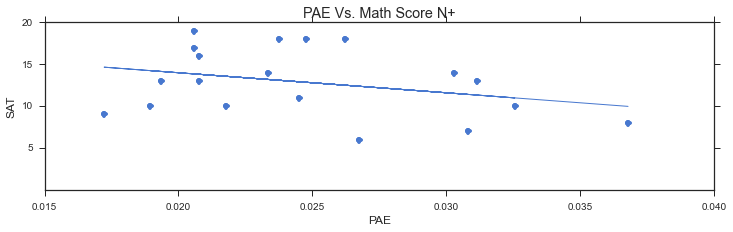

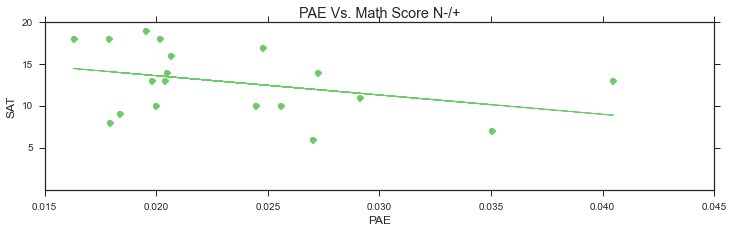

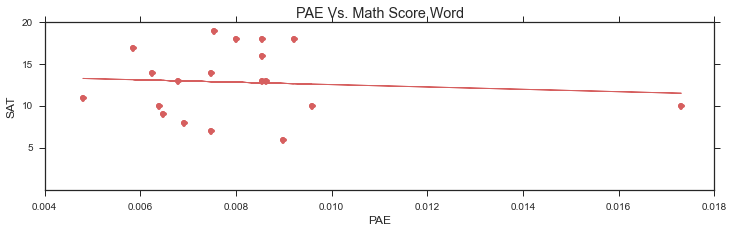

In [402]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(results_df['AbsError+'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError+'],
          results_df['SAT'], 'o', color=pal[0])
plt.plot(results_df['AbsError+'], 
         m1*results_df['AbsError+'] + b1, '-', color=pal[0])
plt.title('PAE Vs. Math Score N+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(results_df['AbsError-'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError-'],
          results_df['SAT'], 'o', color=pal[1])
plt.plot(results_df['AbsError-'], 
         m2*results_df['AbsError-'] + b2, '-', color=pal[1])
plt.title('PAE Vs. Math Score N-/+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m3, b3 = np.polyfit(results_df['AbsErrorw'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsErrorw'],
          results_df['SAT'], 'o', color=pal[2])
plt.plot(results_df['AbsErrorw'], 
         m3*results_df['AbsErrorw'] + b3, '-', color=pal[2])
plt.title('PAE Vs. Math Score Word')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

In [403]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [404]:
slope1, intercept1, r1, p1, stderr1 = linregress(results_df['AbsError+'],results_df['SAT'])
slope2, intercept2, r2, p2, stderr2 = linregress(results_df['AbsError-'],results_df['SAT'])
slope3, intercept3, r3, p3, stderr3 = linregress(results_df['AbsErrorw'],results_df['SAT'])

### r +, r -, r w

In [405]:
print r1, r2, r3

-0.317579764388 -0.357422180324 -0.0897268914498


### R^2 +, R^2 -, R^2 w

In [406]:
print r1*r1, r2*r2, r3*r3

0.100856906749 0.127750614987 0.00805091504925


### p-value +, p-value -, p-value w

In [407]:
print p1, p2, p3

0.185194349249 0.133009071547 0.71489006378


## SD error Vs. MAth Score

(0, 0.04)

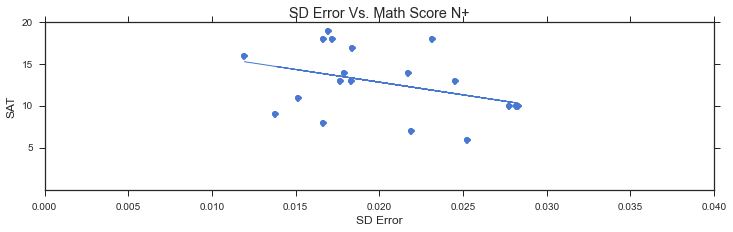

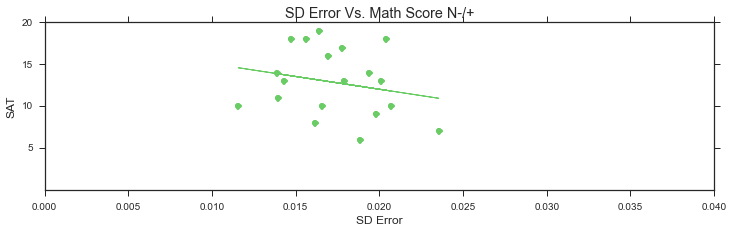

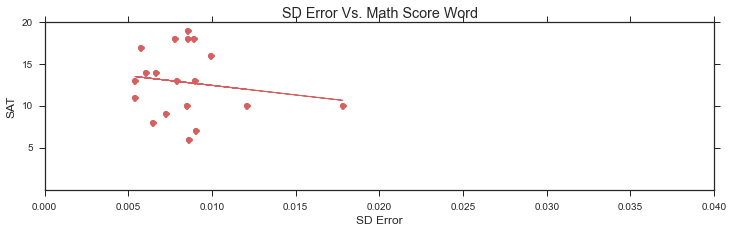

In [408]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(results_df['SD+'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['SD+'],
          results_df['SAT'], 'o', color=pal[0])
plt.plot(results_df['SD+'], 
         m1*results_df['SD+'] + b1, '-', color=pal[0])
plt.title('SD Error Vs. Math Score N+')
plt.xlabel('SD Error', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.xlim([0,0.04])

m2, b2 = np.polyfit(results_df['SD-'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['SD-'],
          results_df['SAT'], 'o', color=pal[1])
plt.plot(results_df['SD-'], 
         m2*results_df['SD-'] + b2, '-', color=pal[1])
plt.title('SD Error Vs. Math Score N-/+')
plt.xlabel('SD Error', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.xlim([0,0.04])

m3, b3 = np.polyfit(results_df['SDw'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['SDw'],
          results_df['SAT'], 'o', color=pal[2])
plt.plot(results_df['SDw'], 
         m3*results_df['SDw'] + b3, '-', color=pal[2])
plt.title('SD Error Vs. Math Score Word')
plt.xlabel('SD Error', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.xlim([0,0.04])

In [409]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [410]:
slope1, intercept1, r1, p1, stderr1 = linregress(results_df['SD+'],results_df['SAT'])
slope2, intercept2, r2, p2, stderr2 = linregress(results_df['SD-'],results_df['SAT'])
slope3, intercept3, r3, p3, stderr3 = linregress(results_df['SDw'],results_df['SAT'])

In [411]:
print r1, r2, r3

-0.371640590975 -0.223570575799 -0.160564754815


In [412]:
print p1, p2, p3

0.117186480724 0.357528728241 0.511404346225


In [413]:
np.corrcoef(results_df['slope-'], results_df['slope+'])

array([[ 1.        ,  0.77210964],
       [ 0.77210964,  1.        ]])

In [414]:
responses = position_tasks.Response.mean()

In [415]:
resp1 = responses.iloc[0:16]
resp2 = responses.iloc[16:32]
resp3 = responses.iloc[32:48]
resp1 = resp1.get_values()
resp2 = resp2.get_values()
resp3 = resp3.get_values()

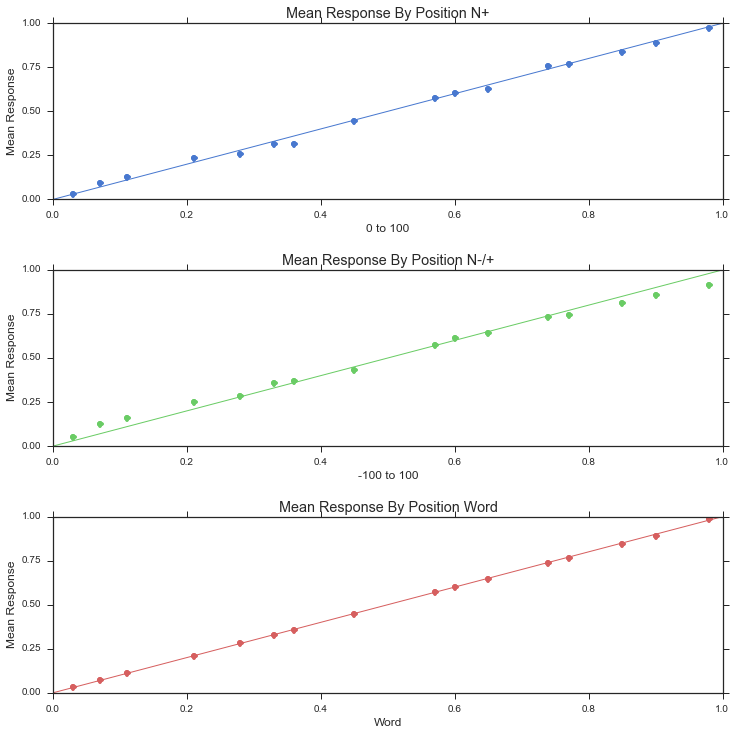

In [416]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, resp1, 'o', color=pal[0])
fig1.plot([0,1], [0,1], color=pal[0], linestyle='-')
plt.title('Mean Response By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([0,.25,.5,.75,1]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, resp2, 'o', color=pal[1])
fig2.plot([0,1], [0,1], color=pal[1], linestyle='-')
plt.title('Mean Response By Position N-/+')
plt.xlabel('-100 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([0,.25,.5,.75,1]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, resp3, 'o', color=pal[2])
fig3.plot([0,1], [0,1], color=pal[2], linestyle='-')
plt.title('Mean Response By Position Word')
plt.xlabel('Word', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([0,.25,.5,.75,1]))

plt.subplots_adjust(hspace=.4)

In [417]:
results_df.corr()

,SAT,Miss+,Miss-,Missw,RT+,RT-,RTw,SD+,SD-,SDw,...,slopew,SD_Lan_+,SD_Lan_-,SD_Lan_w,AbsError+,AbsError-,AbsErrorw,linearity+,linearity-,linearityw
SAT,1.000000,-0.370248,-0.404455,-0.509383,-0.304421,-0.266054,-0.345422,-0.371641,-0.223571,-0.160565,...,0.126342,0.479151,-0.151651,-0.373592,-0.317580,-0.357422,-0.089727,-0.392428,-0.139419,0.055292
Miss+,-0.370248,1.000000,0.427912,0.700109,0.699246,0.523573,0.425382,-0.348611,-0.091555,-0.300943,...,-0.009666,-0.470811,-0.413189,0.189492,-0.221562,0.266028,-0.412776,0.065525,0.503288,-0.218107
Miss-,-0.404455,0.427912,1.000000,0.242127,0.269682,0.209728,0.101969,-0.115999,-0.048208,0.328580,...,-0.231704,-0.364192,0.012503,0.170981,0.161320,0.015545,0.335043,0.322573,0.075874,-0.022565
Missw,-0.509383,0.700109,0.242127,1.000000,0.499295,0.339600,0.408023,-0.065242,-0.220912,-0.288516,...,-0.015182,-0.430220,-0.099197,0.194391,0.046656,0.346969,-0.361115,0.258694,0.393695,-0.336567
RT+,-0.304421,0.699246,0.269682,0.499295,1.000000,0.813349,0.633770,-0.514059,-0.051277,-0.481297,...,0.042582,-0.412194,-0.141366,-0.020499,-0.193101,0.195876,-0.557132,0.028796,0.270492,-0.173833
RT-,-0.266054,0.523573,0.209728,0.339600,0.813349,1.000000,0.765714,-0.367370,-0.091340,-0.653589,...,0.262353,-0.382153,0.060824,0.102637,-0.175975,0.190376,-0.628750,0.070915,0.152962,-0.330851
RTw,-0.345422,0.425382,0.101969,0.408023,0.633770,0.765714,1.000000,-0.278084,-0.111161,-0.607853,...,-0.122719,-0.256837,0.024689,0.219384,0.122259,0.153785,-0.538541,0.357003,0.021955,-0.100920
SD+,-0.371641,-0.348611,-0.115999,-0.065242,-0.514059,-0.367370,-0.278084,1.000000,0.154379,0.477715,...,0.101114,0.140074,-0.069963,0.492030,0.152111,0.102218,0.448820,-0.069424,-0.061199,-0.106526
SD-,-0.223571,-0.091555,-0.048208,-0.220912,-0.051277,-0.091340,-0.111161,0.154379,1.000000,0.322568,...,-0.058646,0.256048,0.160642,0.156236,0.451438,0.258986,0.355460,0.164660,0.136969,0.244812
SDw,-0.160565,-0.300943,0.328580,-0.288516,-0.481297,-0.653589,-0.607853,0.477715,0.322568,1.000000,...,-0.287935,0.209941,-0.146426,0.143723,0.253380,-0.028210,0.929745,0.061864,-0.090957,0.195089


In [418]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

### SD_Lan_+ = correlation between landmark distance and SD of error

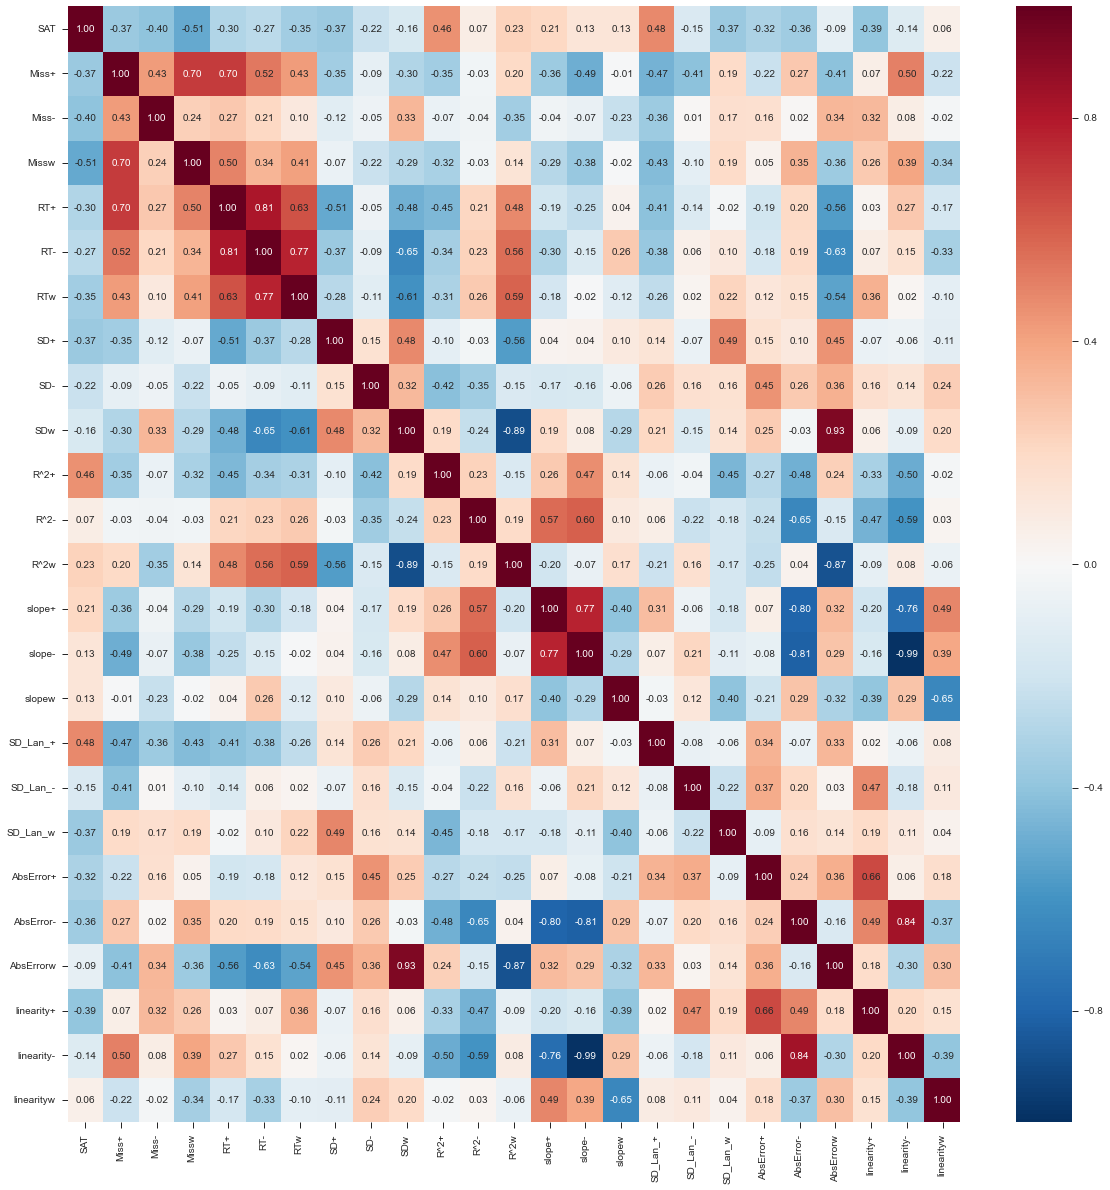

In [419]:
plt.figure(figsize=(20, 20))
sns.heatmap(results_df.corr(), annot=True, fmt='.2f')